In [663]:
import pandas as pd
from pandas import read_excel
import matplotlib.pyplot as plt
import requests
import numpy as np
import random

### April Shin
### Digital Humanities
### Individual Project
### July 5, 2019 

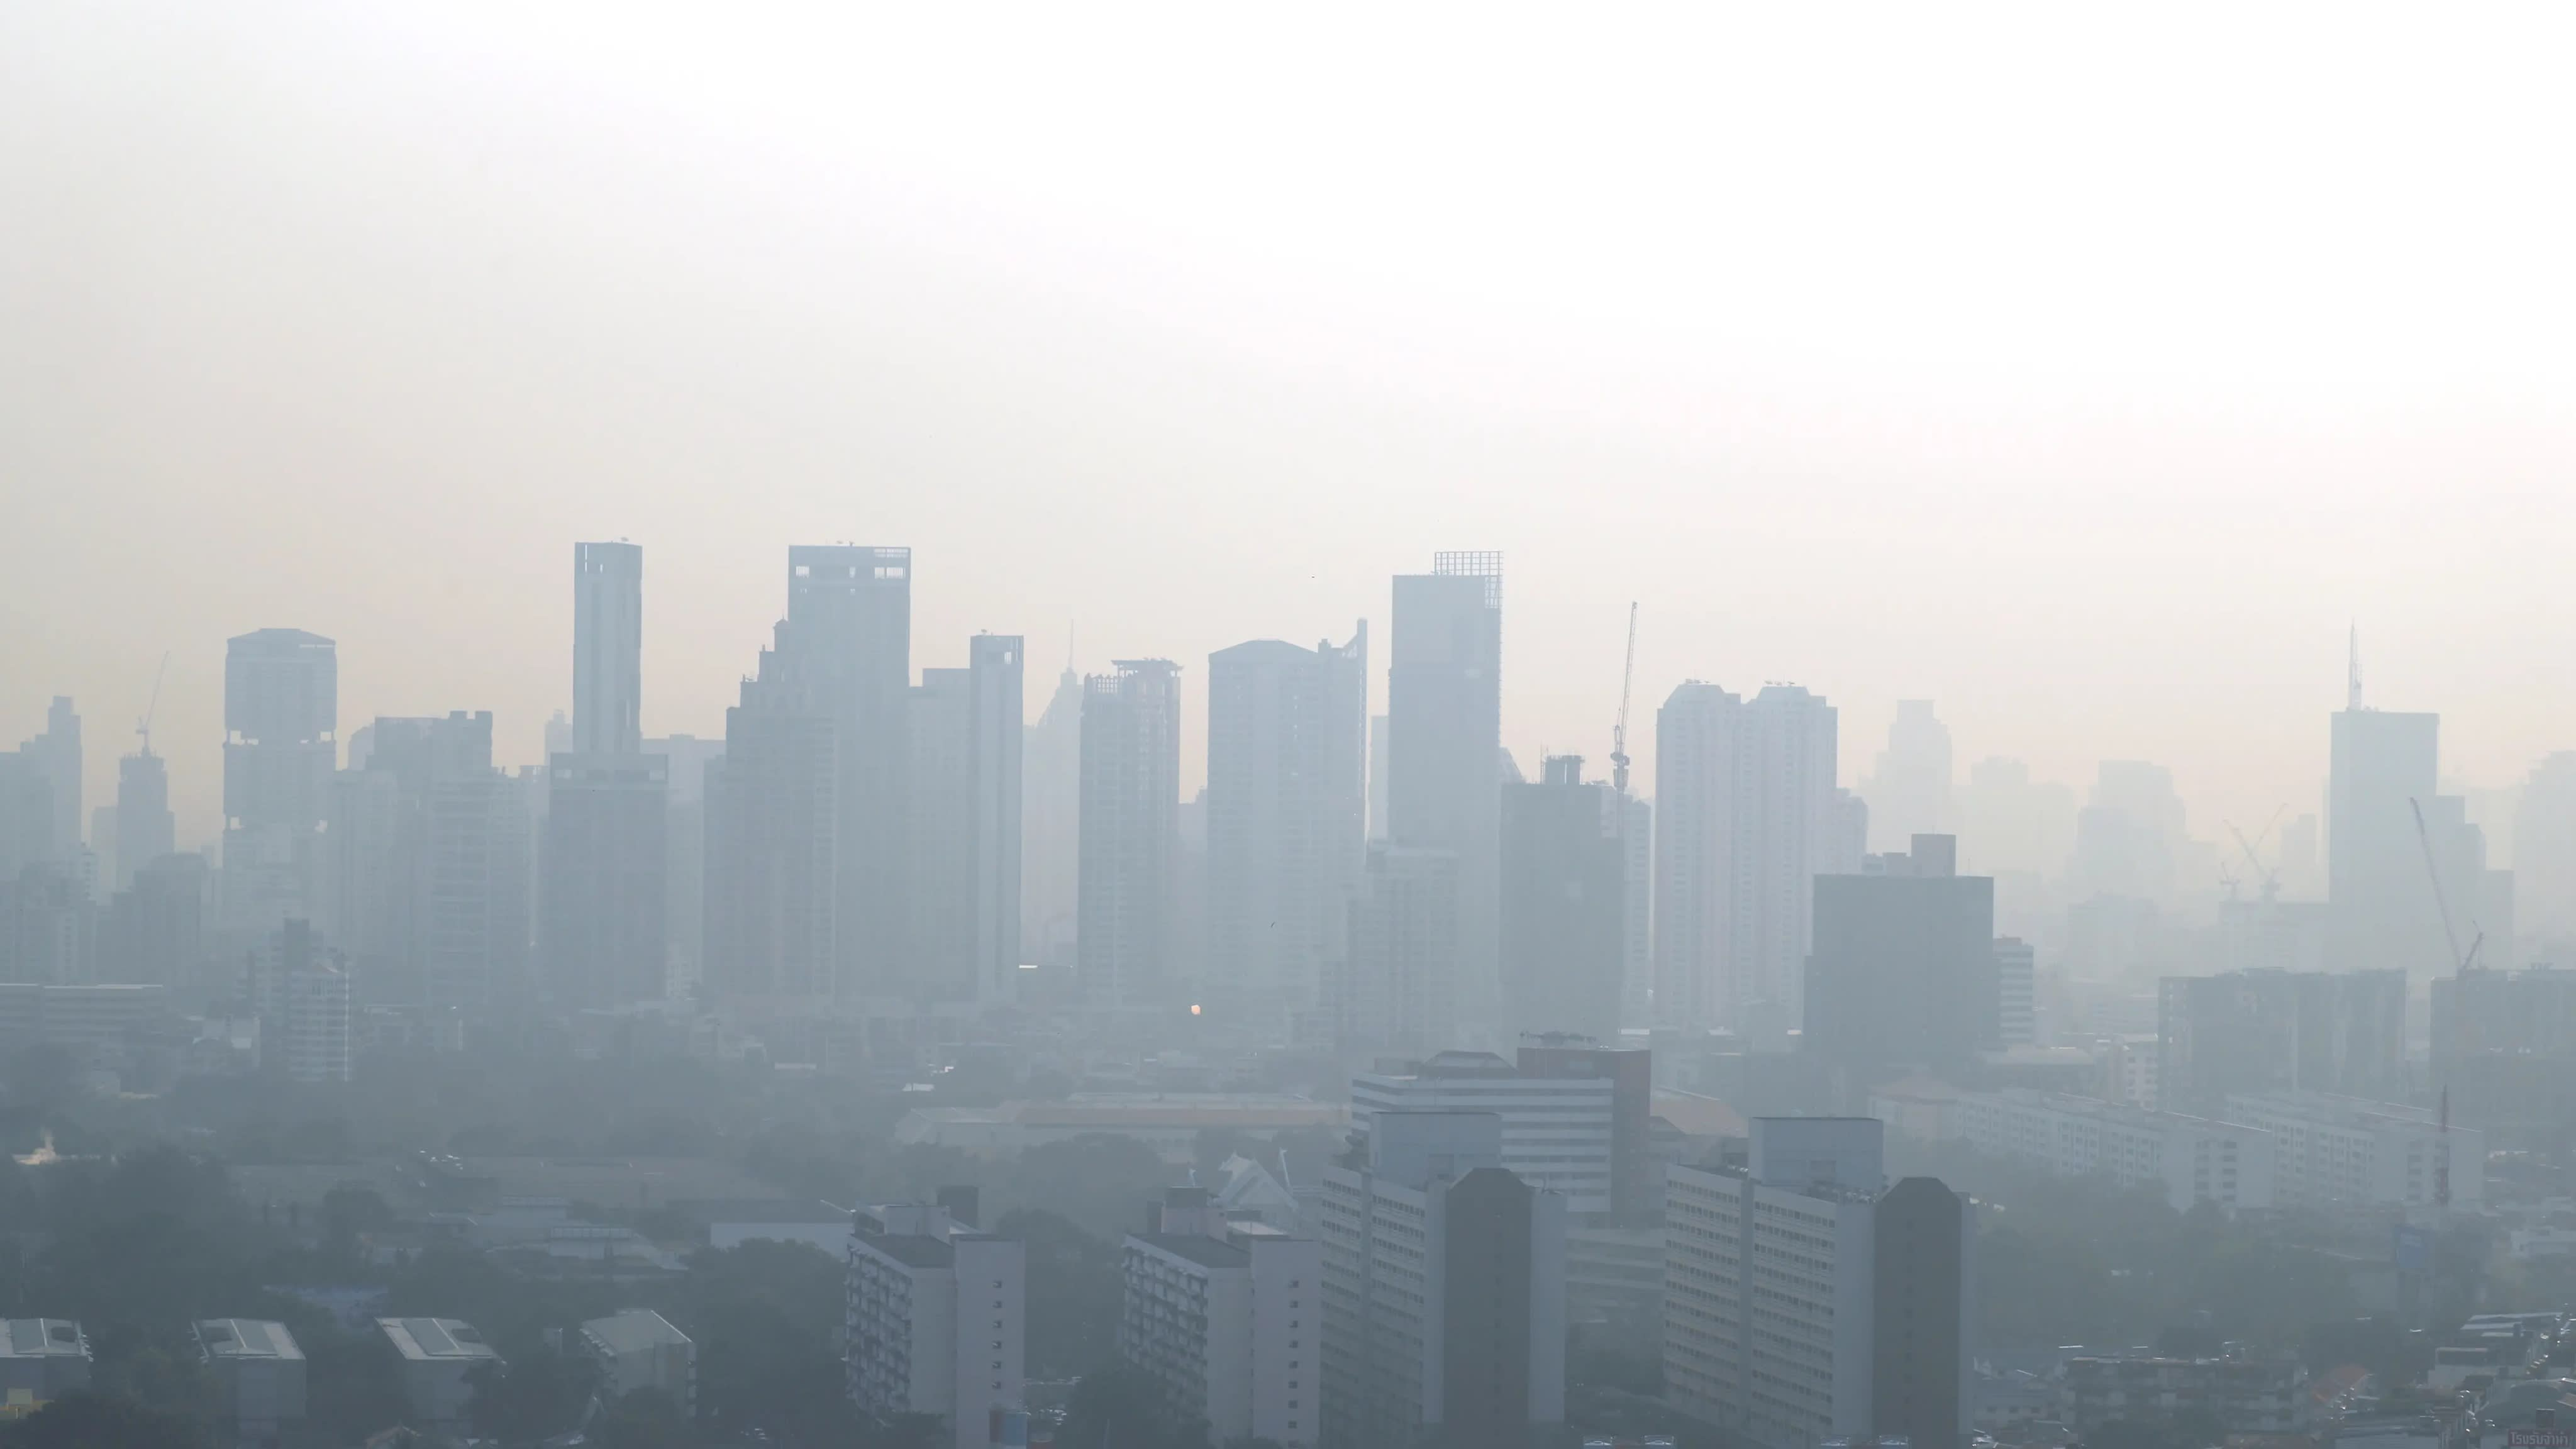
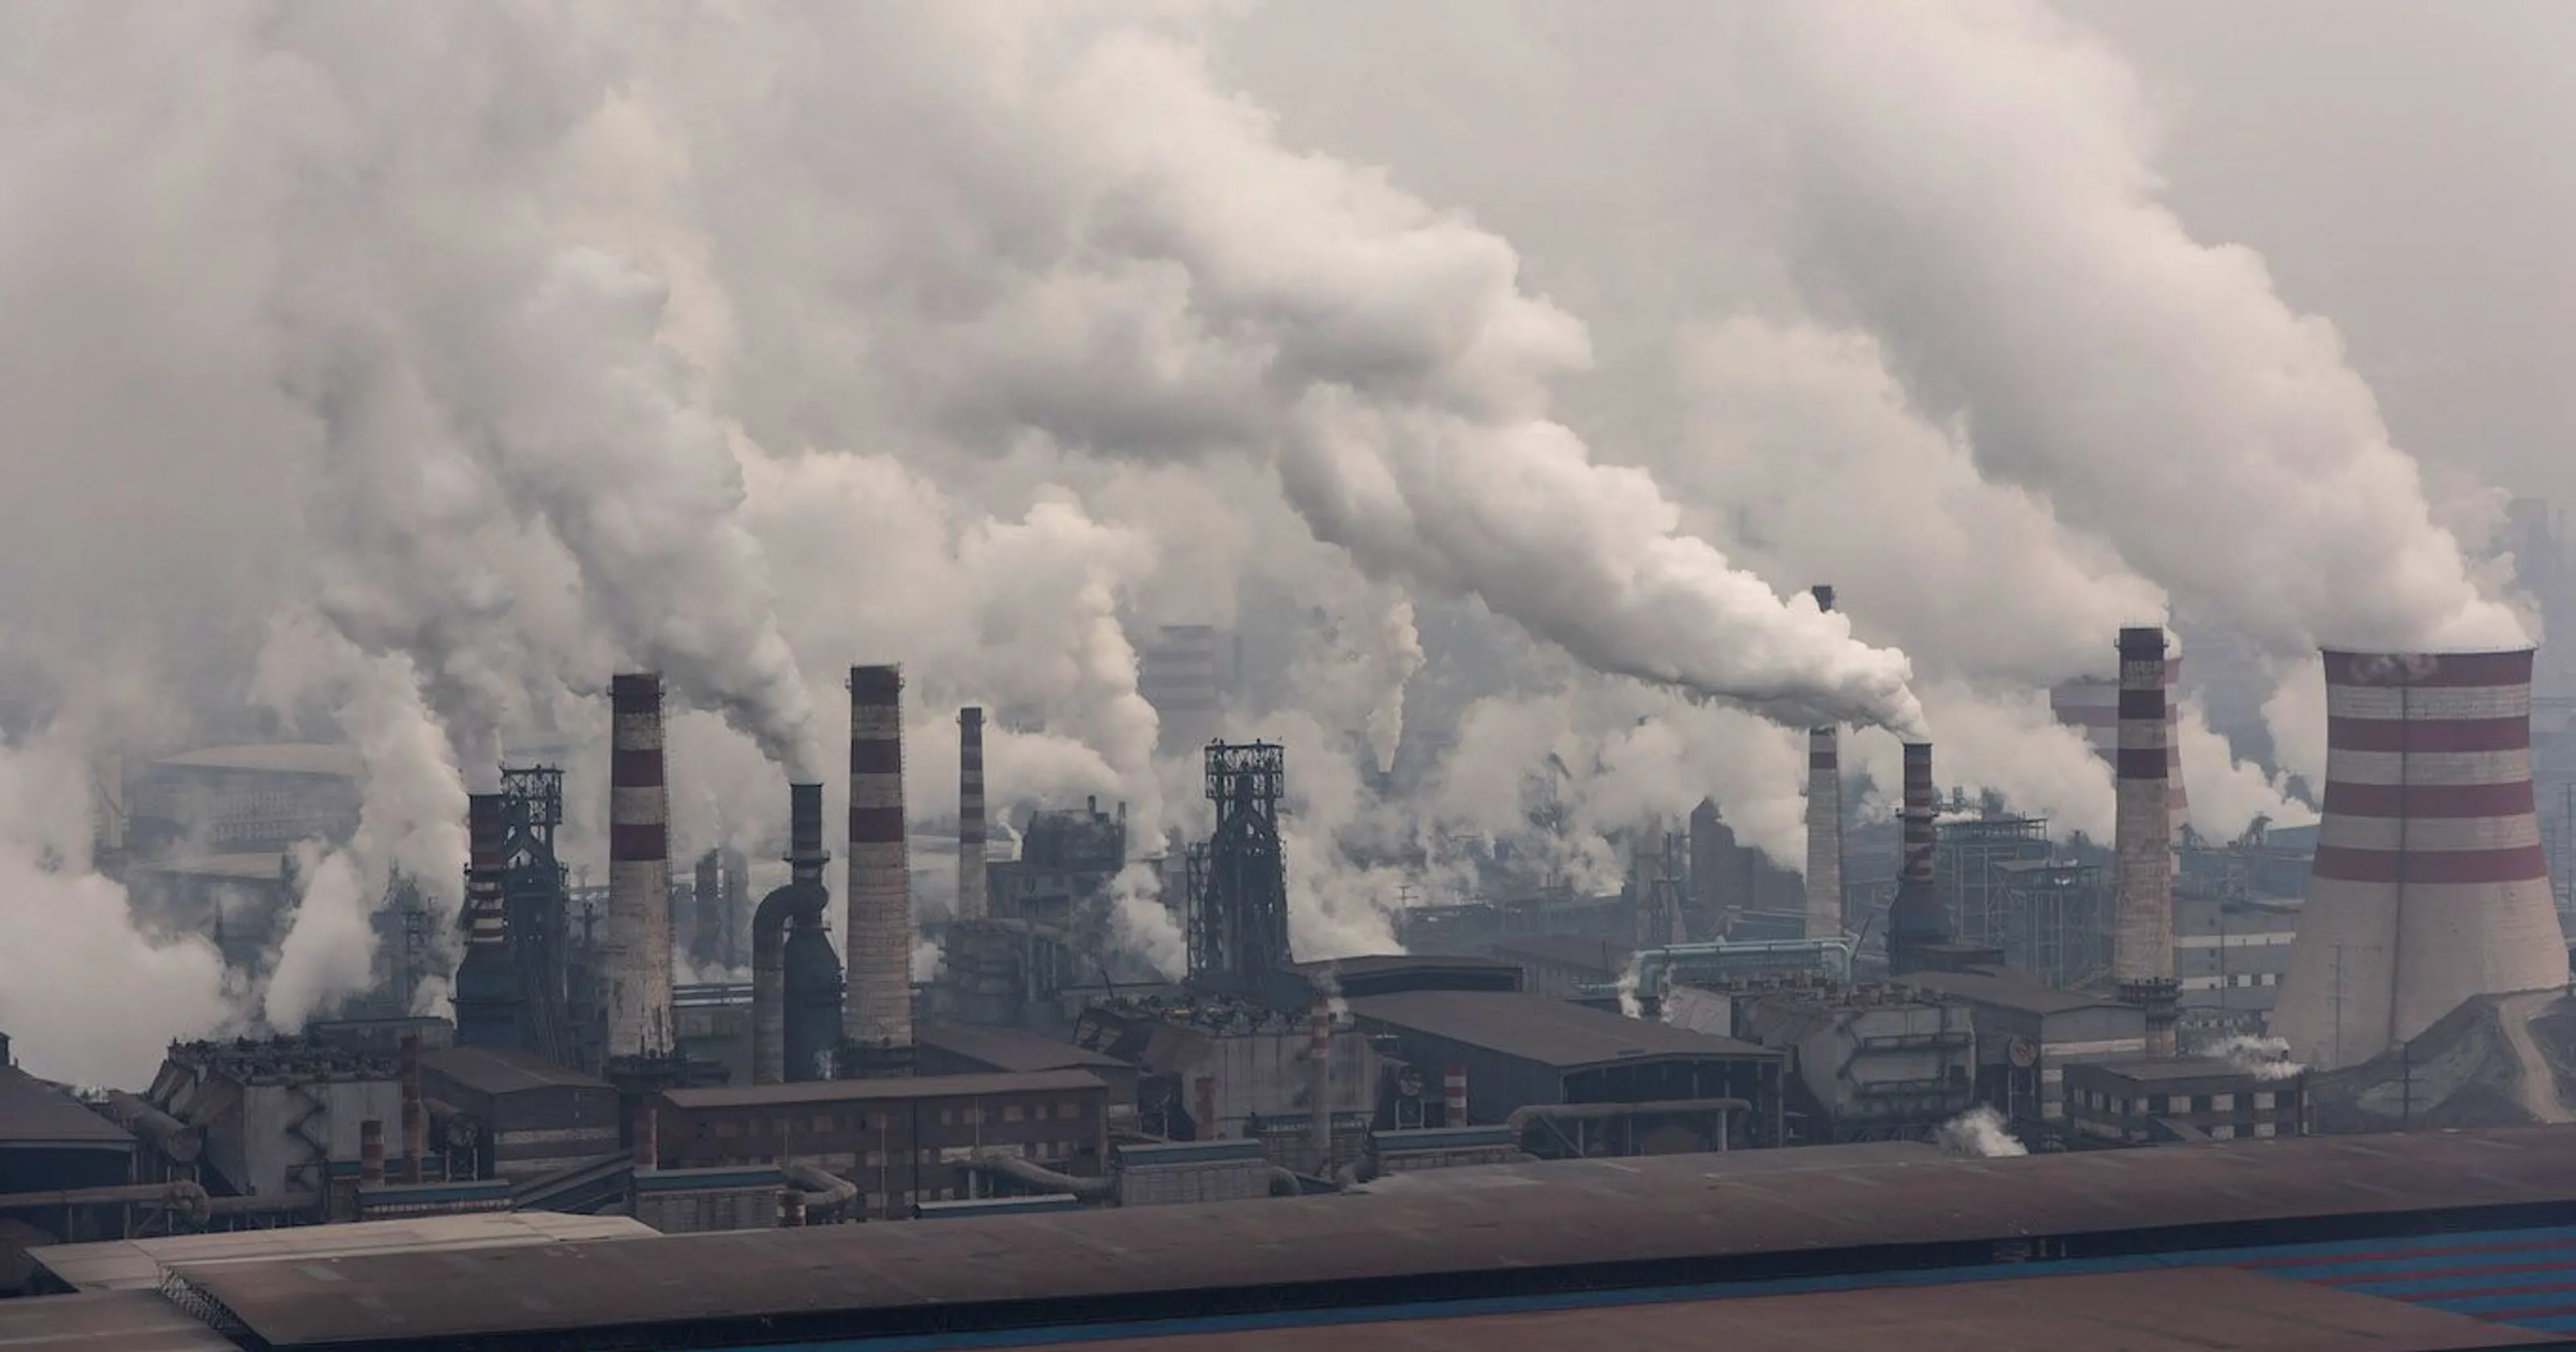

# Individual Research:

### Introduction:
I have been highly interested in the changes in the environment and its impacts on life as well as how the human population contributed to the change. For this project, I decided to do a study on air quality, as it has been a prevalent issue since the beginning of rise of the industry. 

### Research Focus:
- What is the relationship between the human population and Ozone levels in California counties?
    - Does human population density have an effect on ozone levels? (Given that human activity - driving vehicles, for instance - directly contribute to higher ozone levels on the ground level - EPA)
    - Is there an association between asthma and ozone levels?
    
### Data Sources
Geographical regions of the following data cover each county in California, United States:
- Population Density: 2010 US Census. Additional data derived from Open Data Network
- Number of days when ozone levels are above regulatory standards: California Environmental Protection Agency, Air Resource Board: (iADAM) Air Quality Data Statistics
- Average Particulate Matter Concentration: California Environmental Protection Agency, Air Resource Board: (iADAM) Air Quality Data Statistics
- Number of Emergency Room visits due to Asthma: California’s Office of Statewide Health Planning and Development (OSHPD)¶

### Methods
- Process datasets.
    - Import and read csv, xls, xlsx files. Webscrape. Apply pandas methods to process (filter, merge, transpose, sort, etc.) all imported data and create visualizations. Organize into appropriate data structures.
    - Standardize all data.
- Apply A/B testing to test for association. Test for linear relationship.
    - Traditional steps for A/B testing followed: 
        - Create Null/Alternative Hypotheses 
        - Set Test Statistic (used absolute difference between means of the absolute value of standardized data)
        - Set Observed Test Statistic
        - Create 1000 simulations by creating samples through shuffling with replacement from original dataset and computing test statistic
        - Compute p-value 
        - Using p-value, determine if null hypothesis is supported or rejected (setting 1% as the cut-off)
    - Linear Relationship:
        - Calculate Correlation Coefficient

### Summary of Results and Conclusion:
Through my testing, I found that there was an association between # of ER visits due to Asthma and # of days ozone levels are above regulatory standards (for each county in CA). There is also an association between population density and the same ozone level data. However, my tests are questionable because the associations came out to be stronger than expected. A correlation test to determine the strength of the linear relationship between each dataset reveals that the correlation is generally weak (correlation coefficient of ~ 0.4). Therefore, I must be suspicious of my choice of test statistic and, possibly, hypothesis of my A/B tests or perhaps rather than a linear relationship, they may have a different mathematical relationship. Additionally, there are confounding factors commonly known to affect both air quality and asthma patients. For instance, human activity that results contribute to air pollution as well as other biological factors influence human health. The external factors are beyond the scope of this particular research, but are imperative to address as they may contribute to why there is a lower correlation value between the datasets. 
   
### What I learned from this practice:
I was only used to being given data and a corresponding question. Therefore, having to design the research myself and find the appropriate datasets taught me how to be patient and stay disciplined (i.e. not take short cuts with the data analysis). I also learned how important it can be to be able to ask more appropriate questions because they will pave the path to your research; however, I also learned that I should expect myself to go off tangent with my research because I will come across information and data for the first time that will change my perspective on the study and dismiss my original assumptions.  

### What I hope to add onto the project in the future:
I would like to expand the focus of my study. First, I would like to investigate all potential health consequences of air pollution by finding which prevalent health conditions in California have the greatest association with each air pollutant. Second, I would like to study the impacts of human activity, specifically transportation, on the quality of air. I would consider total vehicle mileages, number of roads, and total amount of gasoline sold for each county in California. By understanding the scope of the damages of transportation on air pollution (specifically ozone levels and perhaps particulate matter concentrations), it will contribute to emphasizing the need for improvements and developments for more sustatainable transportation.

California Annual Retail Fuel Outlet Report Results (CEC-A15) Spreadsheets
The following Excel files contain annual CEC-A15 results and analyses summarized in county level tables for station counts, gasoline sales, and diesel sales. Figure in the workbooks graphically display the gasoline sales and diesel sales tables.
https://ww2.energy.ca.gov/almanac/transportation_data/gasoline/piira_retail_survey.html

Electric vehicle sales in each California County:
https://theicct.org/sites/default/files/publications/CA-cityEV-Briefing-20180507.pdf

Public Transit Data:
https://ww2.energy.ca.gov/almanac/transportation_data/transit.html

# ---------------------------------------------------------------------------------------------------------------

## Importing and Processing XLS File of # of Days with Ozone Levels Above Regulatory Standard

"Tropospheric, or ground level ozone, is not emitted directly into the air, but is created by chemical reactions between oxides of nitrogen (NOx) and volatile organic compounds (VOC). This happens when pollutants emitted by cars, power plants, industrial boilers, refineries, chemical plants, and other sources chemically react in the presence of sunlight."
-- United States Environmental Protection Agency 
(https://www.epa.gov/ground-level-ozone-pollution/ground-level-ozone-basics)

### Preparing datasets for analysis
- Sorting values by average
- Selecting every few county for analysis
- Creating tables (organizing all datasets to have matching table structure - transposing, merging, sorting, etc)
    - Organzing tables by years, counties

In [664]:
annual_ozone = read_excel("C:/Users/pro/Downloads/Days_Ozone_Levels_Above_Regulatory_Standard.xls", sheet_name = "Sheet 1")
annual_ozone

Unnamed: 0 Unnamed: 1  Unnamed: 2  \
0                                                 NaN        NaN         NaN   
1                                                 NaN        NaN         NaN   
2                                                 NaN        NaN         NaN   
3                                                 NaN        NaN         NaN   
4                                                 NaN        NaN         NaN   
5                                                 NaN        NaN         NaN   
6   Air Quality: Days with Ozone Levels Above Regu...        NaN         NaN   
7                                                 NaN        NaN         NaN   
8                                           Locations       Days         NaN   
9                                                 NaN       2009      2010.0   
10                                         California         24        19.0   
11                                     Alameda County          8         5.0   
12                                      Alpine County        NaN         NaN   
13                                      Amador County          1        11.0   
14                                       Butte County         29        13.0   
15                                   Calaveras County         31        13.0   
16                                      Colusa County          0         1.0   
17                                Contra Costa County          6         7.0   
18                                   Del Norte County        NaN         NaN   
19                                   El Dorado County         35        19.0   
20                                      Fresno County         71        57.0   
21                                       Glenn County          4         0.0   
22                                    Humboldt County          0         0.0   
23                                    Imperial County         26        29.0   
24                                        Inyo County          3         2.0   
25                                        Kern County        103        88.0   
26                                       Kings County         38        53.0   
27                                        Lake County          0         0.0   
28                                      Lassen County        NaN         NaN   
29                                 Los Angeles County         75        75.0   
..                                                ...        ...         ...   
50                             San Luis Obispo County         19        25.0   
51                                   San Mateo County          0         1.0   
52                               Santa Barbara County          7         5.0   
53                                 Santa Clara County          7         8.0   
54                                  Santa Cruz County          0         0.0   
55                                      Shasta County          8        12.0   
56                                      Sierra County        NaN         NaN   
57                                    Siskiyou County          0         0.0   
58                                      Solano County          4         3.0   
59                                      Sonoma County          0         0.0   
60                                  Stanislaus County         32        18.0   
61                                      Sutter County          5         3.0   
62                                      Tehama County         24        14.0   
63                                     Trinity County        NaN         NaN   
64                                      Tulare County         92        90.0   
65                                    Tuolumne County         19         8.0   
66                                     Ventura County         37        13.0   
67                                        Yolo County          8         2.0   
68                                        Y

In [894]:
ozoneDaysCA = pd.DataFrame()
partMatterCA = pd.DataFrame()

def prepare_excel(air_df, assignOzone):
    
    global partMatterCA
    
    # Dropped all counties with missing values
    air_rename = air_df.rename(index=str, columns={"Unnamed: 0": "County", "Unnamed: 1": "2009", "Unnamed: 2": "2010", "Unnamed: 3": "2011", "Unnamed: 4": "2012", "Unnamed: 5": "2013", "Unnamed: 6": "2014", "Unnamed: 7": "2015", "Unnamed: 8": "2016"}).dropna()

    # Getting mean of each row
    avg_column = air_rename.mean(axis = 1)
    air_rename['Average'] = avg_column
    
    # Sorting air quality data by each county's average in decreasing order
    air_sorted = air_rename[1:].sort_values(by=['Average'], ascending=False)
    
    if assignOzone:
        ozoneDaysCA = prepare_ozone(air_sorted)
        result_excel = ozoneDaysCA
    else:
        # First value is California's average particulate matter concentration per year
        # Saving California's average particulate matter concentration Data per year
        partMatterCA = air_sorted[0:1]
        result_excel = air_sorted
        
    return result_excel

def prepare_ozone(air_sorted):
    global ozoneDaysCA
    # First value is California's total # of days ozone levels above regulatory standards per year
    # Saving California's total # of days ozone levels above regulatory standards per year
    ozoneDaysCA = air_sorted[0:1]

    # Because averages are so similar, I decided to choose every 5th county to analyze (for simpler visual purposes)
    air_analyze = air_sorted[0:len(air_sorted['Average']):5]

    air_analyze = prepare_table(air_analyze)
    

    # To simplify demonstration
    air_analyze = air_analyze.drop(["Amador County", "Solano County", "Siskiyou County"], axis=1)
    return air_analyze
    
def prepare_table(air):
    indices = air.index.tolist()
    county = air['County'].tolist()
    air = air.transpose()
    count = 0
    
    # Renaming columns by county name:
    for name in county:
        air = air.rename(index=str, columns={str(indices[count]): name})
        count += 1

    return air[1:9]
          

In [666]:
def prepare_full_table(table, prepare_ozone):
    prepare = prepare_excel(table, prepare_ozone)
    prepare = prepare_table(prepare)
    prepare_transpose = prepare.transpose()
    prepare_transpose['County'] = prepare_transpose.index
    return prepare_transpose

In [667]:
ozoneAll = prepare_full_table(annual_ozone, False)
ozoneAll

2009 2010 2011 2012 2013 2014 2015 2016  \
San Bernardino County   104   97  100   99   98   93   86  106   
Tulare County            92   90  101  110   79   81   67   87   
Kern County             103   88   80   83   64   88   69   78   
Fresno County            71   57   69   87   81   82   73   75   
Riverside County         89   76   90   76   76   66   55   69   
Los Angeles County       75   75   74   81   57   64   80   60   
Kings County             38   53   46   27   47   39   42   49   
Madera County            26   18   28   46   43   45   29   40   
Merced County            35   28   38   24   29   40   29   28   
El Dorado County         35   19   39   41   21   33   19   41   
Sacramento County        47   25   46   53   16   34   14   23   
Stanislaus County        32   18   33   55   22   27   28   27   
San Diego County         40   19   29   21   24   28   30   29   
Nevada County            34   15   18   16   19   28   26   39   
Placer County            30   21   24   30    6   19   15   27   
Imperial County          26   29   21   26   23   12   12   11   
Mariposa County          21   20   20   34   16   17    5   16   
Tehama County            24   14   14   15    8   15   16   42   
San Joaquin County       19    8   21   35    5   16   19   19   
Tuolumne County          19    8   12   13    2   16   11   45   
Ventura County           37   13   13   24   10   15   13    7   
San Luis Obispo County   19   25   14   29    9    7    4    6   
Butte County             29   13   16   24    5   11    8   13   
Calaveras County         31   13   11   13    2    4   18   22   
Sutter County             5    3    8   14    4    7    7   30   
Amador County             1   11    3   20    2   10    8    5   
Shasta County             8   12    5    4    2    5    7   13   
Orange County            12    4    4    4    5   10    8   13   
Alameda County            8    5    8    4    2    6    7   15   
Inyo County               3    2   17    7    3    3    3    5   
San Benito County         5    6    2    8    5    3    0    5   
Contra Costa County       6    7    5    4    1    4    6    2   
Santa Barbara County      7    5    3    3    2    6    1    2   
Santa Clara County        7    8    1    3    1    4    4    1   
Yolo County               8    2    1    8    0    1    3    4   
Solano County             4    3    3    3    2    1    1    1   
Napa County               2    2    0    0    2    0    0    0   
San Mateo County          0    1    0    0    1    0    1    0   
Lake County               0    0    0    3    0    0    0    0   
Glenn County              4    0    1    0    1    1    0    0   
Siskiyou County           0    0    0    1    1    0    0    0   
Santa Cruz County         0    0    0    1    0    0    0    0   
Colusa County             0    1    0    0    0    0    0    0   
Mendocino County          0    0    0    0    0    0    0    0   
Marin County              0    0    0    0    0    0    0    0   
Sonoma County             0    0    0    0    0    0    0    0   
Monterey County           1    0    0    0    0    0    0    0   
Humboldt County           0    0    0    0    0    0    0    0   
San Francisco County      0    0    0    0    0    0    0    0   

                                        County  
San Bernardino County    San Bernardino County  
Tulare County                    Tulare County  
Kern County                        Kern County  
Fresno County                    Fresno County  
Riverside County              Riverside County  
Los Angeles County          Los Angeles County  
Kings County                      Kings County  
Madera County                    Madera County  
Merced County                    Merced County  
El Dorado County              El Dorado County  
Sacramento County            Sacramento County  
Stanislaus County            Stanislaus County  
San Diego County              San Diego County  
Nevada County                    Nev

In [668]:
ozoneDays = prepare_excel(annual_ozone, True)
ozoneDays

San Bernardino County Los Angeles County Sacramento County  \
2009                   104                 75                47   
2010                    97                 75                25   
2011                   100                 74                46   
2012                    99                 81                53   
2013                    98                 57                16   
2014                    93                 64                34   
2015                    86                 80                14   
2016                   106                 60                23   

     Imperial County Ventura County San Benito County Sonoma County  
2009              26             37                 5             0  
2010              29             13                 6             0  
2011              21             13                 2             0  
2012              26             24                 8             0  
2013              23             10                 5             0  
2014              12             15                 3             0  
2015              12             13                 0             0  
2016              11              7                 5             0

In [669]:
ozoneDays.columns.tolist()

['San Bernardino County',
 'Los Angeles County',
 'Sacramento County',
 'Imperial County',
 'Ventura County',
 'San Benito County',
 'Sonoma County']

## Importing and Processing Annual Average Particulate Matter Concentration per County Data
 "Fine particulate matter" (PM 2.5) is an air pollutant commonly found in diesel exhaust. PM 2.5 refers to particles with a diameter of less than 2.5 microns, or about 1/10,000 of an inch. The national annual PM 2.5 standard is 12 micrograms per cubic meter (µg/m³); concentrations at or above 12 µg/m³ are considered potentially harmful to health, especially for sensitive groups such as young children and those with asthma. Data are limited because (i) monitoring stations are usually in urban areas.
 -- kidsdata.
 
 “ 'Particulate matter' (PM) is the general term used for a mixture of solid particles and liquid droplets
found in the air. Airborne PM comes from many different sources. “Primary” particles are released
directly into the atmosphere from sources such as cars, trucks, heavy equipment, forest fires, and
other burning activities (e.g., burning waste, wood stoves, wood-fired boilers). Primary particles also
consist of crustal material from sources such as unpaved roads, stone crushing, construction sites,
and metallurgical operations. “Secondary” particles are formed in the air from reactions involving
precursor chemicals such as sulfates (which are formed from sulfur dioxide emissions from power
plants and industrial facilities), nitrates (which are formed from nitrogen dioxide emissions from
cars, trucks, and power plants), and carbon-containing reactive organic gas emissions from cars,
trucks, industrial facilities, forest fires, and biogenic sources such as trees (U.S. EPA, 2009)." - EPA
 
### Data source: California Environmental Protection Agency, Air Resource Board: (iADAM) Air Quality Data Statistics; U.S. Environmental Protection Agency, Particulate Matter (PM 2.5) Trends (Jul. 2017).

In [670]:
annual_part = read_excel("C:/Users/pro/Downloads/air09to16.xls", sheet_name = "Sheet 1")
annual_part

Unnamed: 0  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
5                                                 NaN   
6   Air Quality: Annual Average Particulate Matter...   
7                                                 NaN   
8                                           Locations   
9                                                 NaN   
10                                         California   
11                                     Alameda County   
12                                      Alpine County   
13                                      Amador County   
14                                       Butte County   
15                                   Calaveras County   
16                                      Colusa County   
17                                Contra Costa County   
18                                   Del Norte County   
19                                   El Dorado County   
20                                      Fresno County   
21                                       Glenn County   
22                                    Humboldt County   
23                                    Imperial County   
24                                        Inyo County   
25                                        Kern County   
26                                       Kings County   
27                                        Lake County   
28                                      Lassen County   
29                                 Los Angeles County   
..                                                ...   
50                             San Luis Obispo County   
51                                   San Mateo County   
52                               Santa Barbara County   
53                                 Santa Clara County   
54                                  Santa Cruz County   
55                                      Shasta County   
56                                      Sierra County   
57                                    Siskiyou County   
58                                      Solano County   
59                                      Sonoma County   
60                                  Stanislaus County   
61                                      Sutter County   
62                                      Tehama County   
63                                     Trinity County   
64                                      Tulare County   
65                                    Tuolumne County   
66                                     Ventura County   
67                                        Yolo County   
68                                        Yuba County   
69                                                NaN   
70                                                NaN   
71  Definition: Annual average concentration of fi...   
72                                                NaN   
73                                                NaN   
74  Data Source: As cited on kidsdata.org, Califor...   
75                                                NaN   
76                                                NaN   
77                 Downloaded on 6/17/2019 2:12:33 AM   
78                                                NaN   
79  https://www.kidsdata.org/topic/524/environment...   

                    Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0                          NaN         NaN         NaN         NaN   
1                          NaN         NaN         NaN         NaN   
2                          NaN         NaN         NaN         NaN   
3                          NaN         NaN         NaN         NaN   
4                          NaN         NaN         NaN         NaN   
5                          NaN         NaN         NaN         NaN   
6                 

In [671]:
partAll = prepare_full_table(annual_part, False)
partAll

2009  2010  2011  2012  2013  2014  2015  2016  \
Kern County             22.5  17.6  16.2  14.7  22.8  21.6  17.9  15.9   
Kings County            17.7  17.9    18  14.8  18.2  17.5  16.5  15.5   
Tulare County             16  13.6  16.1  14.8  18.9  17.9  16.1  14.7   
Fresno County           18.3  14.7  17.9  15.4  16.8  16.6    15    13   
Stanislaus County       16.1  12.7  17.1  14.8  15.1  12.3  14.2  12.7   
Merced County           13.6  16.3  15.6    11  13.5  11.2  12.8    12   
San Joaquin County      11.3    11  11.3  12.4  17.7  12.1  12.8  11.8   
Los Angeles County      14.8  12.5  13.2  12.6  12.2   7.2  12.9    12   
Imperial County            8  12.8   7.5   8.1  13.3  13.8  11.6  12.5   
San Luis Obispo County   9.3   8.2    12   9.6  12.5  12.8  11.2   8.4   
San Diego County        13.5  10.8  10.9  11.1    11  10.2   9.3   8.7   
Alameda County           9.4   7.8  10.1   9.5  12.8   9.6  10.2   8.7   
Sacramento County       10.7   8.8  10.5   9.1  11.5   8.8  10.4   8.8   
Santa Clara County      10.1   8.2   9.9   9.2  12.4   8.4    10   9.1   
Ventura County          10.7   8.7   8.8   9.6   9.4   9.6   9.7   9.6   
Solano County            9.7   7.7   9.8     9    10   9.9   9.7   7.5   
Santa Barbara County     6.9   8.9    11   8.6     9   8.9   8.3   7.1   
San Francisco County     9.7  10.5   9.5   8.2  10.1   7.7   7.9   7.8   
Contra Costa County      8.4   7.1   7.8   6.6    12  10.5     9   8.1   
San Mateo County         8.7   8.4   8.8   8.5  10.7   7.2     6   8.5   
Calaveras County         6.1   6.4   9.1     7   9.1   7.9   8.7   8.1   
Sonoma County            8.4   7.3   8.6   8.3   8.6   7.7   6.9   4.9   
Placer County            8.6   6.6   8.5   6.5   7.5   7.8   8.1   6.8   
Inyo County              6.8   7.1   8.1   6.7   7.8   7.8   6.7   6.2   
Monterey County          5.8   6.6   6.4   6.1   6.7   6.5   6.3   6.9   
Humboldt County            7   5.6   6.6   6.8   7.1   5.4   5.9     6   
Santa Cruz County        5.7   6.5   6.5   5.9   6.7   5.7   6.3   5.6   
Shasta County            6.7   6.3   5.4   5.9   5.9   5.2   7.5   5.2   
San Benito County        5.5   5.8   5.9   5.1   6.1   4.9   4.6   4.7   
Lake County              3.3     3   3.4   3.8   3.8     4   3.8   2.9   

                                        County  
Kern County                        Kern County  
Kings County                      Kings County  
Tulare County                    Tulare County  
Fresno County                    Fresno County  
Stanislaus County            Stanislaus County  
Merced County                    Merced County  
San Joaquin County          San Joaquin County  
Los Angeles County          Los Angeles County  
Imperial County                Imperial County  
San Luis Obispo County  San Luis Obispo County  
San Diego County              San Diego County  
Alameda County                  Alameda County  
Sacramento County            Sacramento County  
Santa Clara County          Santa Clara County  
Ventura County                  Ventura County  
Solano County                    Solano County  
Santa Barbara County      Santa Barbara County  
San Francisco County      San Francisco County  
Contra Costa County        Contra Costa County  
San Mateo County              San Mateo County  
Calaveras County              Calaveras County  
Sonoma County                    Sonoma County  
Placer County                    Placer County  
Inyo County                        Inyo County  
Monterey County                Monterey County  
Humboldt County                Humboldt County  
Santa Cruz County            Santa Cruz County  
Shasta County                    Shasta County  
San Benito County            San Benito County  
Lake County                        Lake County

In [672]:
#Extracting San Bernardino County's row before preparing table (Contains a 'NaN' value)
sb_list = annual_part.iloc[46].tolist()[1:]

#Preparing annual_part's table (Making identical to ozoneDays' table structure)
p = prepare_excel(annual_part, False)
partMatter = pd.DataFrame()

for i in range(len(p['County'])):
    if (p["County"][i] in ozoneDays.columns.tolist()):
        partMatter = partMatter.append(p[i:i+1])
        
partMatter = prepare_table(partMatter)

#Insert San Bernardino County's data
partMatter.insert(0, "San Bernardino County", sb_list)
partMatter

San Bernardino County Los Angeles County Imperial County  \
2009                   14.7               14.8               8   
2010                   13.0               12.5            12.8   
2011                   13.3               13.2             7.5   
2012                   12.8               12.6             8.1   
2013                   12.3               12.2            13.3   
2014                    NaN                7.2            13.8   
2015                   14.5               12.9            11.6   
2016                   14.8                 12            12.5   

     Sacramento County Ventura County Sonoma County San Benito County  
2009              10.7           10.7           8.4               5.5  
2010               8.8            8.7           7.3               5.8  
2011              10.5            8.8           8.6               5.9  
2012               9.1            9.6           8.3               5.1  
2013              11.5            9.4           8.6               6.1  
2014               8.8            9.6           7.7               4.9  
2015              10.4            9.7           6.9               4.6  
2016               8.8            9.6           4.9               4.7

# Webscraping Population Density Data from Open Data Network's API

In [673]:
#Extracting data from API
def requests_get(url):
    r = requests.get(url)
    return r.json()

In [674]:
#We only look from 2009 to 2017 because that is the only data they are confident about (Rest are predictions)
#Population density is computed by dividing the total population by Land Area Per Square Mile

# To process data extracted from API
def parse_results(results):
    values_list = []
    for dictionary in results['data']['rows']:
        year = dictionary['c'][0]['v']
        if (year >= 2009 and year <= 2017):
            value = round(dictionary['c'][1]['v'])
            values_list.append(value)
    return values_list

In [675]:
alameda_url = 'https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&forecast=5&format=google&variable=geographic.population.density&entity_id=0500000US06001'
kings_url = 'https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&forecast=5&format=google&variable=demographics.population.count&entity_id=0500000US06031'

san_bernardino_url = 'https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&forecast=5&format=google&variable=geographic.population.density&entity_id=0500000US06071'
los_angeles_url = 'https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&forecast=5&format=google&variable=geographic.population.density&entity_id=0500000US06037'
sacramento_url = 'https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&forecast=5&format=google&variable=geographic.population.density&entity_id=0500000US06067'
imperial_url = 'https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&forecast=5&format=google&variable=geographic.population.density&entity_id=0500000US06025'
ventura_url = 'https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&forecast=5&format=google&variable=geographic.population.density&entity_id=0500000US06111'
amador_url = 'https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&forecast=5&format=google&variable=geographic.population.density&entity_id=0500000US06005'
san_benito_url = 'https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&forecast=5&format=google&variable=geographic.population.density&entity_id=0500000US06005'
solano_url = 'https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&forecast=5&format=google&variable=geographic.population.density&entity_id=0500000US06095'
siskiyou_url = 'https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&forecast=5&format=google&variable=demographics.population.count&entity_id=0500000US06093'
sonoma_url = 'https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&forecast=5&format=google&variable=geographic.population.density&entity_id=0500000US06097'

kern_url = 'https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&forecast=5&format=google&variable=geographic.population.density&entity_id=0500000US06029'
merced_url = 'https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&forecast=5&format=google&variable=geographic.population.density&entity_id=0500000US06047'
san_diego_url = 'https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&forecast=5&format=google&variable=geographic.population.density&entity_id=0500000US06073'
calaveras_url = 'https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&forecast=5&format=google&variable=geographic.population.density&entity_id=0500000US06009'
humboldt_url = 'https://api.opendatanetwork.com/data/v1/values?app_token=cQovpGcdUT1CSzgYk0KPYdAI0&describe=true&forecast=5&format=google&variable=geographic.population.density&entity_id=0500000US06023'

countyNames = ozoneDays.columns.tolist()
countyList = [san_bernardino_url, los_angeles_url, sacramento_url, imperial_url, ventura_url, san_benito_url, sonoma_url]

county_df = pd.DataFrame(index = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])
index = 0
for county in countyList:
    county_df[countyNames[index]] = parse_results(requests_get(county))
    index+= 1
county_df
county_df_0916 = county_df[:8]
county_df_0916

San Bernardino County  Los Angeles County  Sacramento County  \
2009                     99                2411               1426   
2010                    100                2405               1446   
2011                    101                2412               1460   
2012                    102                2425               1474   
2013                    103                2438               1488   
2014                    104                2458               1503   
2015                    104                2474               1520   
2016                    105                2478               1534   

      Imperial County  Ventura County  San Benito County  Sonoma County  
2009               38             430                 64            295  
2010               40             439                 64            301  
2011               41             443                 64            304  
2012               42             446                 64            307  
2013               42             450                 63            309  
2014               42             453                 62            312  
2015               43             456                 62            314  
2016               43             457                 62            316

### CA Counties Population Density from US 2010 Census
https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?src=CF

Population Density: Density per square mile of land area per county

In [676]:
pop = pd.read_csv("C:/Users/pro/Downloads/2010_pop_census/DEC_10_SF1_GCTPH1.US05PR_with_ann.csv")
pop = pop.drop(["GEO.id", "GEO.id2", "GEO.display-label", "GCT_STUB.target-geo-id", "GCT_STUB.target-geo-id2", "GCT_STUB.display-label", "SUBHD0301"], axis=1)
pop = pop.rename(columns = {"GCT_STUB.display-label.1": "County", "SUBHD0401": "Population Density"})[3:]
# Merging with other table to work with same counties
pop = pop.merge(ozoneAll).drop(ozoneDays.index, axis = 1)
pop['Population Density'] = pop['Population Density'].astype(float)
pop = pop.sort_values("Population Density")
pop

County  Population Density
11             Inyo County                 1.8
39         Siskiyou County                 7.2
18         Mariposa County                12.6
4            Colusa County                18.6
8             Glenn County                21.4
44           Tehama County                21.5
46         Tuolumne County                24.9
19        Mendocino County                25.1
9          Humboldt County                37.7
28       San Benito County                39.8
10         Imperial County                41.8
3         Calaveras County                44.7
38           Shasta County                46.9
14             Lake County                51.5
1            Amador County                64.1
16           Madera County                70.6
33  San Luis Obispo County                81.7
45           Tulare County                91.7
29   San Bernardino County               101.5
23           Nevada County               103.1
12             Kern County               103.3
6         El Dorado County               106.0
13            Kings County               110.1
21         Monterey County               126.5
20           Merced County               132.2
2             Butte County               134.4
35    Santa Barbara County               155.0
7            Fresno County               156.2
43           Sutter County               157.3
22             Napa County               182.4
48             Yolo County               197.9
25           Placer County               247.6
26        Riverside County               303.8
41           Sonoma County               307.1
42       Stanislaus County               344.2
47          Ventura County               446.7
17            Marin County               485.1
32      San Joaquin County               492.6
40           Solano County               503.0
37       Santa Cruz County               589.4
30        San Diego County               735.8
36      Santa Clara County              1381.0
5      Contra Costa County              1465.2
27       Sacramento County              1470.8
34        San Mateo County              1602.2
0           Alameda County              2043.6
15      Los Angeles County              2419.6
24           Orange County              3807.7
31    San Francisco County             17179.2

# Experimenting with different graphs

### Creating Bar Graphs of Population Density VS Air Quality Data (# of Days Ozone Levels Above Reg. Standard & Particulate Matter Concentration)

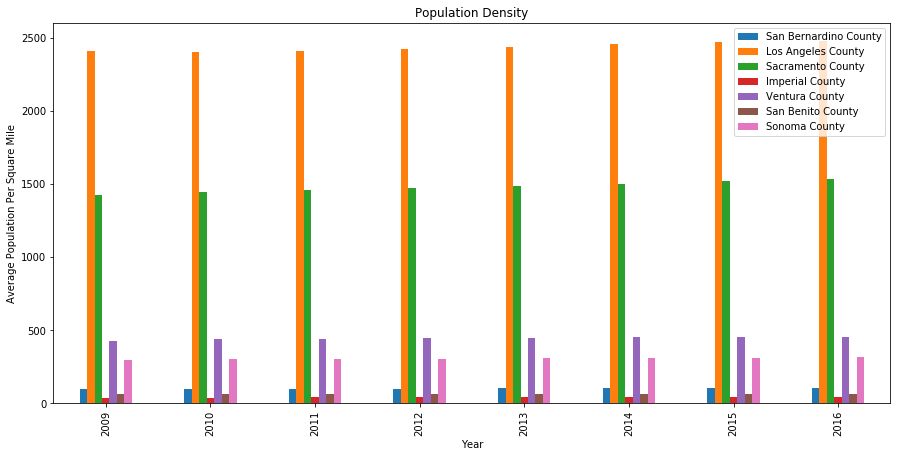

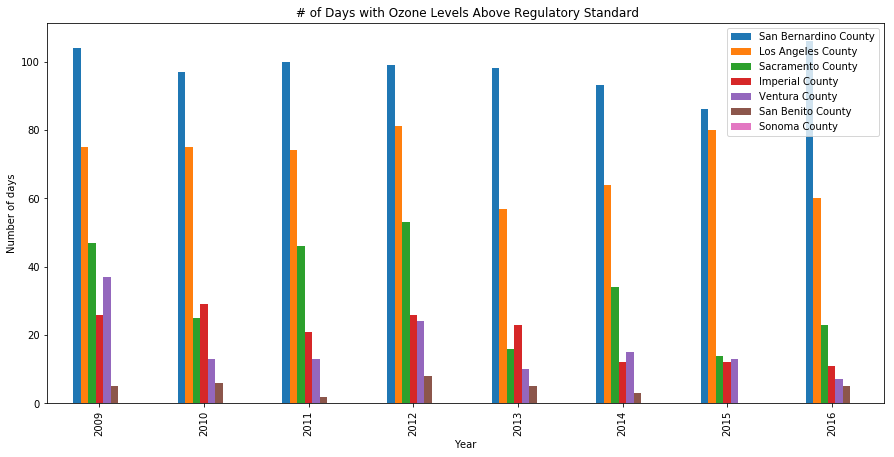

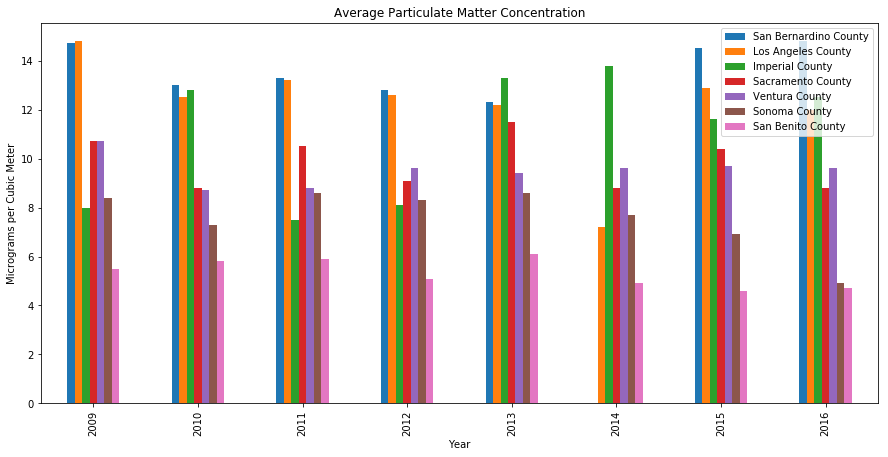

In [677]:
county_df_0916.plot.bar(figsize=(15,7))
plt.title("Population Density")
plt.ylabel("Average Population Per Square Mile")
plt.xlabel("Year")
plt.show()

ozoneDays.plot.bar(figsize=(15,7))
plt.title(" # of Days with Ozone Levels Above Regulatory Standard")
plt.ylabel("Number of days")
plt.xlabel("Year")
plt.show()

partMatter.plot.bar(figsize=(15,7))
plt.title("Average Particulate Matter Concentration")
plt.ylabel("Micrograms per Cubic Meter")
Poplt.xlabel("Year")
plt.show()

Possible reasoning behind trends in bar graphs:

- San Bernardino County has a very low population density, yet has the highest number of days when ozone levels were above the regulatory standard. Winds that blow pollutants from the Los Angeles County Basin and into San Bernardino County may contribute to this.
(https://www.vvdailypress.com/news/20190426/san-bernardino-county-air-quality-receives-failing-grade).

- The additions made to the Clean Air Act in 2013 by EPA may contribute to the sudden drop in the number of days when ozone levels are higher than regulatory standards (https://oag.ca.gov/environment/clean-air)

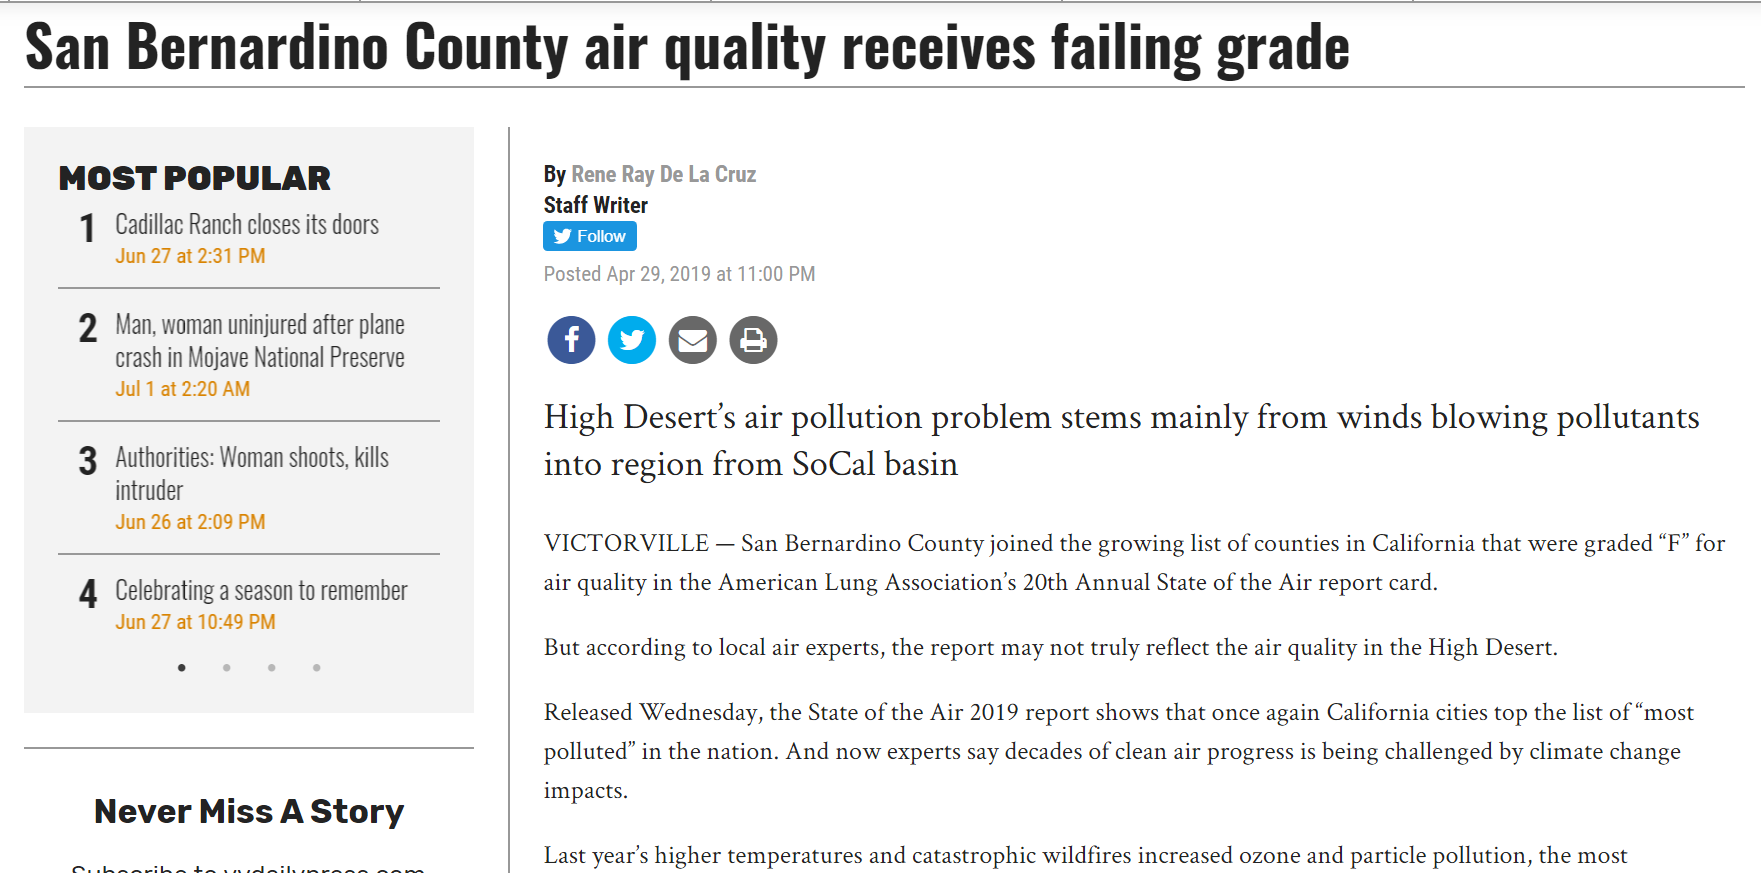

## ------------------------------------------------------------------------------------------------------------------

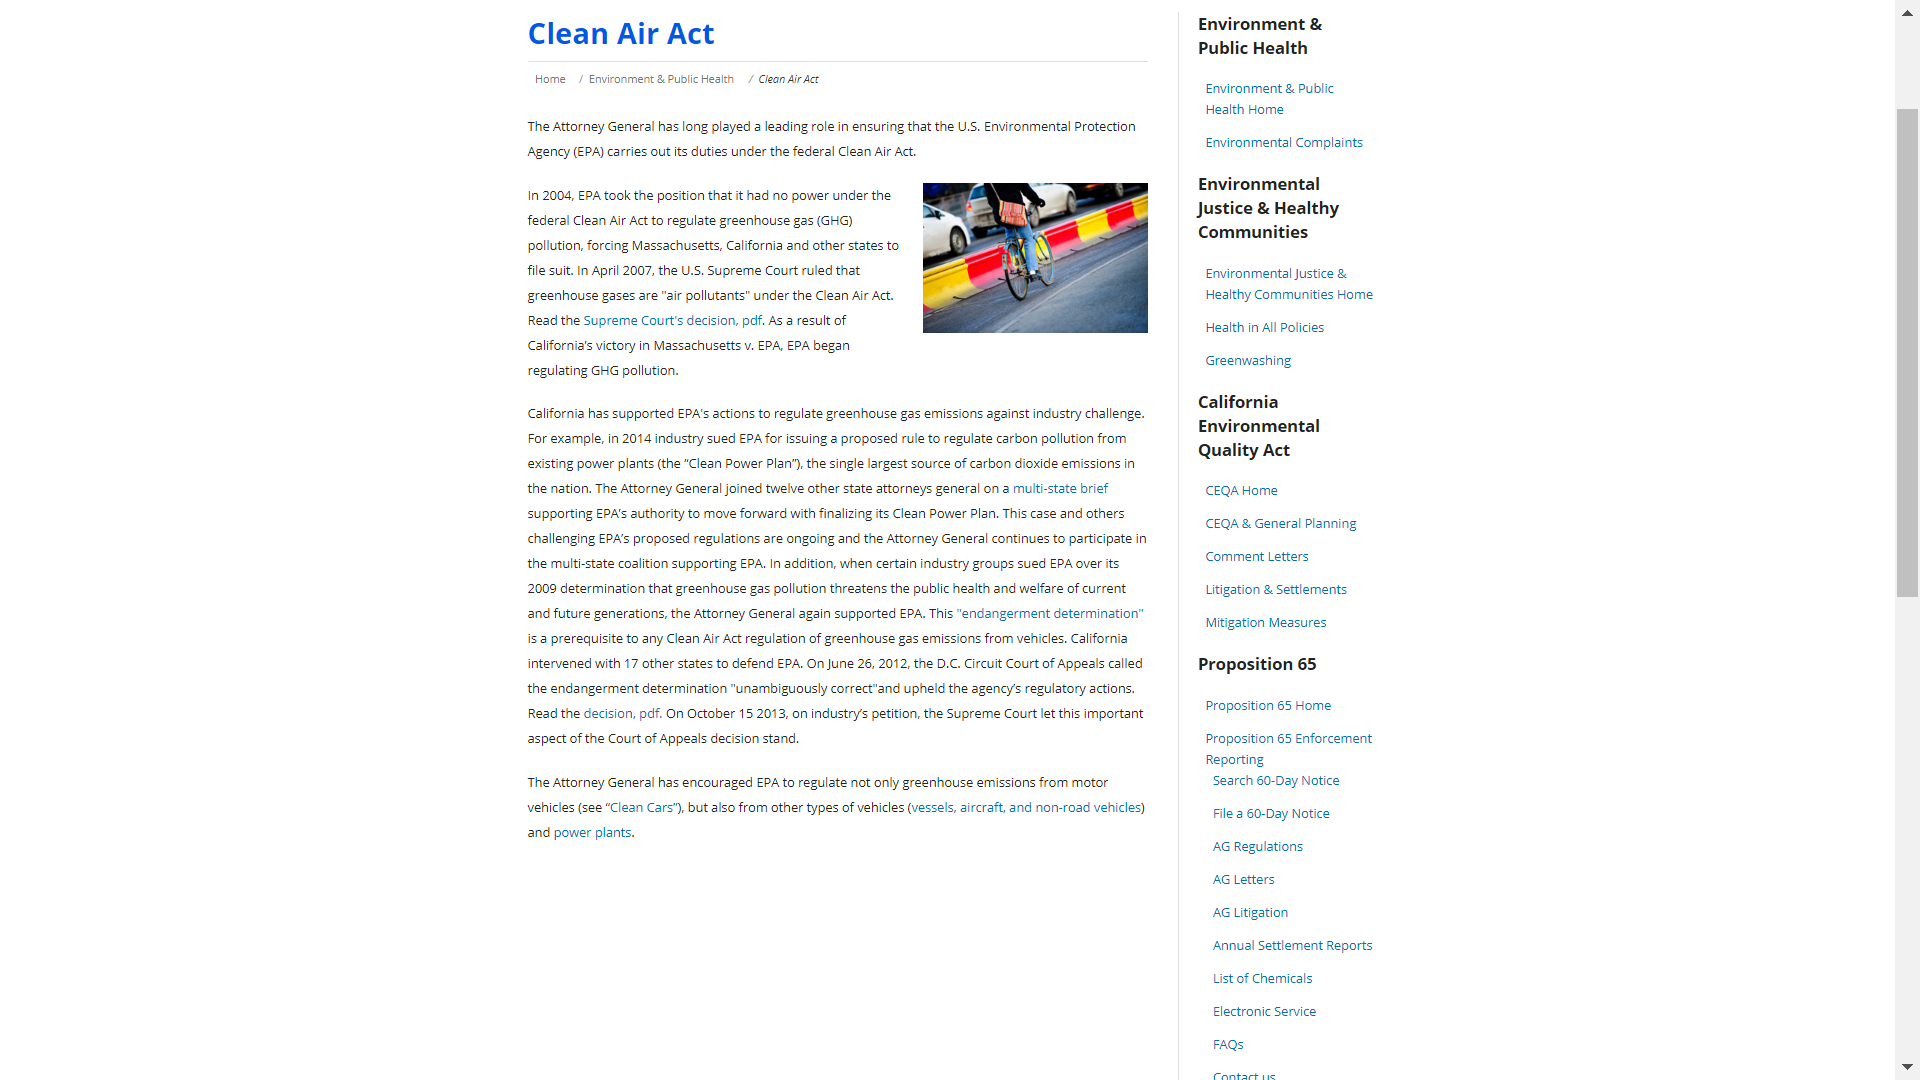

### Los Angeles County

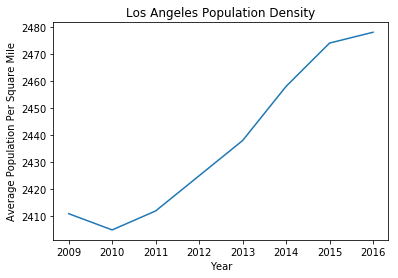

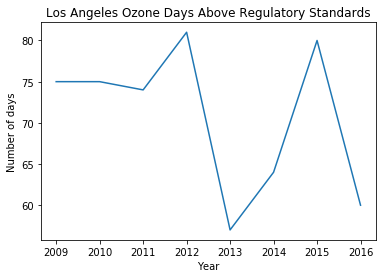

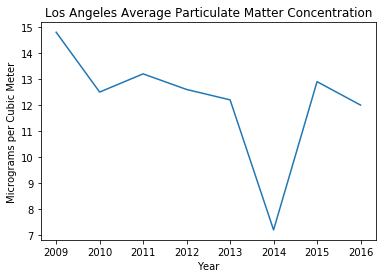

In [678]:
plt.plot(county_df_0916.index, county_df_0916['Los Angeles County'])
plt.title("Los Angeles Population Density")
plt.ylabel("Average Population Per Square Mile")
plt.xlabel("Year")
plt.show()

plt.plot(ozoneDays.index, ozoneDays['Los Angeles County'])
plt.title("Los Angeles Ozone Days Above Regulatory Standards")
plt.ylabel("Number of days")
plt.xlabel("Year")
plt.show()

plt.plot(partMatter.index, partMatter['Los Angeles County'])
plt.title("Los Angeles Average Particulate Matter Concentration")
plt.ylabel("Micrograms per Cubic Meter")
plt.xlabel("Year")
plt.show()

---------------------------------------------------------------------------------------------------------------------------

# Determine if there is an association between population density and air pollution data

### 2016 Data Analysis

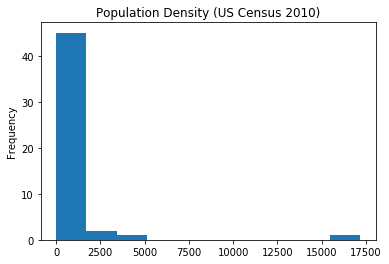

In [871]:
pop['Population Density'].plot.hist(title = "Population Density (US Census 2010)");

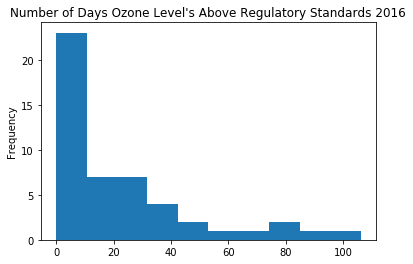

In [872]:
ozoneAll['2016'].plot.hist(title = "Number of Days Ozone Level's Above Regulatory Standards 2016");

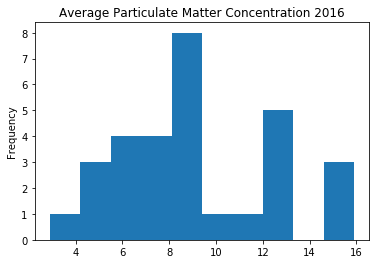

In [873]:
partAll['2016'].plot.hist(title = 'Average Particulate Matter Concentration 2016');

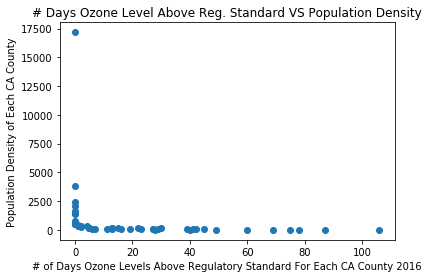

In [682]:
#plt.figure(figsize=(10,10))
plt.scatter(ozoneAll['2016'].tolist(), pop['Population Density'].tolist())
plt.xlabel("# of Days Ozone Levels Above Regulatory Standard For Each CA County 2016")
plt.ylabel("Population Density of Each CA County")
plt.title("# Days Ozone Level Above Reg. Standard VS Population Density");

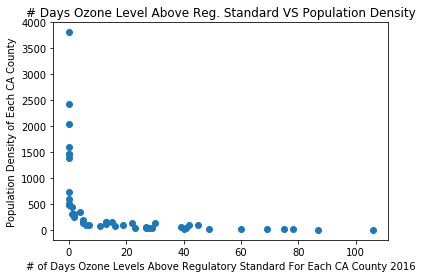

In [683]:
#plt.figure(figsize=(10,10))
plt.scatter(ozoneAll['2016'][:-1].tolist(), pop['Population Density'][:-1].tolist())
plt.xlabel("# of Days Ozone Levels Above Regulatory Standard For Each CA County 2016")
plt.ylabel("Population Density of Each CA County")
plt.title("# Days Ozone Level Above Reg. Standard VS Population Density");

### Converting to Standard Units to make visualization of datasets with different units more clear.

In [886]:
# Standard units = the number of standard deviations above average

def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

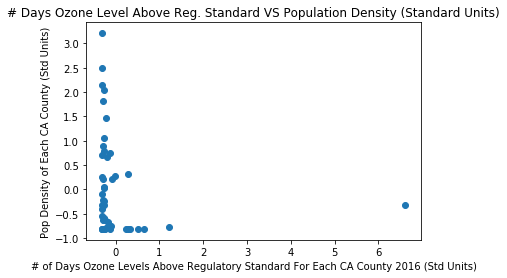

In [887]:
# Plotting with standard units
# Allows me to compare two sets of data based on different units.

pop_stand = standard_units(pop["Population Density"].tolist())
ozone_stand = standard_units(ozoneAll['2016'].tolist())
plt.scatter(pop_stand, ozone_stand)
plt.title("# Days Ozone Level Above Reg. Standard VS Population Density (Standard Units)")
plt.xlabel("# of Days Ozone Levels Above Regulatory Standard For Each CA County 2016 (Std Units)")
plt.ylabel("Pop Density of Each CA County (Std Units)");

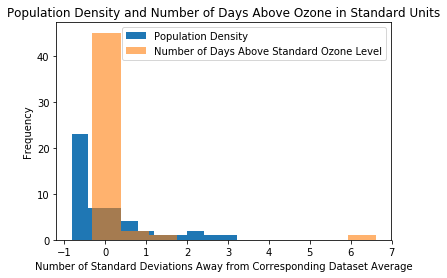

In [888]:
# Plotting histogram of datasets converted to standard units
plt.hist(ozone_stand)
plt.hist(pop_stand, alpha = 0.6)
labels = ['Population Density', 'Number of Days Above Standard Ozone Level']
plt.legend(labels)
plt.ylabel("Frequency")
plt.xlabel("Number of Standard Deviations Away from Corresponding Dataset Average")
plt.title("Population Density and Number of Days Above Ozone in Standard Units");

# A/B Testing

Using A/B Testing to see if different datasets (Population Density and # of days ozone levels are above regulatory standards) have an association.

We do so by testing our hypotheses (stated below) to see if which hypothesis is best supported by the data we are testing.

"To see how the statistic should vary under the null hypothesis, we have to figure out how to simulate the statistic under that hypothesis. A clever method based on random permutations does just that." - Data 8 Textbook


##### Null Hypothesis: 
The differences and similarities in the distribution between the # of Days above standard ozone level is the same for population density per county in CA happens by random chance.

##### Alternative Hypothesis: 
The air quality is influenced by population density. Differences or similarities between the two distributions is not by random chance. 

##### Test Statistic:
Absolute difference between mean of standard deviations of two groups (number of counties above corresponding average)

In [1071]:
def difference_of_means(data, ozone):
    difference = abs(np.mean(data) - np.mean(ozone))
    return difference

def one_simulated_difference(data, ozone):
    # Shuffling list WITH replacement
    ozone_shuffled = np.asarray([random.choice(ozone) for _ in range(len(ozone))])
    return difference_of_means(data, ozone_shuffled)

def permutation_test(data, ozone):
    differences = np.zeros(0)
    repetitions = 1000
    for i in range(repetitions):
        new_difference = one_simulated_difference(pop_stand, ozone_stand)
        differences = np.append(new_difference, differences)
    return differences

def ABTest(data,ozone):
    
    difference_of_means(data, ozone)
    
    # Observed Value (Test Statistic Using Original Data)
    # Difference of means between two groups (standard deviations above average)
    observed_value = difference_of_means(data, ozone)
    print("Observed Value: ", observed_value)
    
    result = permutation_test(data,ozone)
    plt.hist(result)
    plt.plot([observed_value], [0], marker = 'o', markersize = 9, color = "red")
    
    empirical_p = np.count_nonzero(differences >= observed_value) / repetitions
    print("Empirical P-value: ", empirical_p)
    print("The empirical P-value is ", empirical_p, " in this particular run, meaning that about ", 1000 - int(1000*empirical_p), " our of 1000 permuted samples resulted in a difference of ", observed_value, " or lower.")
    return empirical_p

Observed Value:  0.3756509935949809
Empirical P-value:  0.004
The empirical P-value is  0.004  in this particular run, meaning that about  996  our of 1000 permuted samples resulted in a difference of  0.3756509935949809  or lower.


0.004

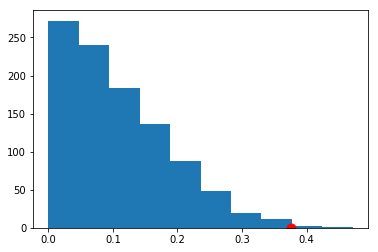

In [1072]:
ABTest(abs(pop_stand), abs(ozone_stand))

## Conclusion for A/B Testing between pop. density and ozone level data:
The p-value is an extremely small value of 0.004, even smaller than a 1% cut-off. Therefore, we can reject the null hypothesis and conclude that there is an association between population density and ozone level data.

# ---------------------------------------------------------------------------------------------------------------

# Source: California’s Office of Statewide Health Planning and Development (OSHPD)
In addition to the annual and quarterly financial reports, all non-federal hospitals licensed in California submit reports and datasets to OSHPD.

### Study on Asthma
Records on Emergency Room visits for asthma-related causes in licensed hospitals in each county of California from 2011 to 2017.

In [996]:
asthma_11to17 = pd.read_csv("C:/Users/pro/Desktop/asthma-ed-visit-rates-lghc-indicator-07.csv")
asthma_11to17

Geography  Year    Age Group            Strata  Strata Name  \
0             Alameda  2015  18 and Over  Total Population  18 and Over   
1              Amador  2015  18 and Over  Total Population  18 and Over   
2               Butte  2015  18 and Over  Total Population  18 and Over   
3           Calaveras  2015  18 and Over  Total Population  18 and Over   
4          California  2015  18 and Over  Total Population  18 and Over   
5              Colusa  2015  18 and Over  Total Population  18 and Over   
6        Contra Costa  2015  18 and Over  Total Population  18 and Over   
7           Del Norte  2015  18 and Over  Total Population  18 and Over   
8           El Dorado  2015  18 and Over  Total Population  18 and Over   
9              Fresno  2015  18 and Over  Total Population  18 and Over   
10              Glenn  2015  18 and Over  Total Population  18 and Over   
11           Humboldt  2015  18 and Over  Total Population  18 and Over   
12           Imperial  2015  18 and Over  Total Population  18 and Over   
13               Inyo  2015  18 and Over  Total Population  18 and Over   
14               Kern  2015  18 and Over  Total Population  18 and Over   
15              Kings  2015  18 and Over  Total Population  18 and Over   
16               Lake  2015  18 and Over  Total Population  18 and Over   
17             Lassen  2015  18 and Over  Total Population  18 and Over   
18        Los Angeles  2015  18 and Over  Total Population  18 and Over   
19             Madera  2015  18 and Over  Total Population  18 and Over   
20              Marin  2015  18 and Over  Total Population  18 and Over   
21           Mariposa  2015  18 and Over  Total Population  18 and Over   
22          Mendocino  2015  18 and Over  Total Population  18 and Over   
23             Merced  2015  18 and Over  Total Population  18 and Over   
24              Modoc  2015  18 and Over  Total Population  18 and Over   
25               Mono  2015  18 and Over  Total Population  18 and Over   
26           Monterey  2015  18 and Over  Total Population  18 and Over   
27               Napa  2015  18 and Over  Total Population  18 and Over   
28             Nevada  2015  18 and Over  Total Population  18 and Over   
29             Orange  2015  18 and Over  Total Population  18 and Over   
...               ...   ...          ...               ...          ...   
8141             Napa  2017     Under 18               Sex         Male   
8142           Nevada  2017     Under 18               Sex         Male   
8143           Orange  2017     Under 18               Sex         Male   
8144           Placer  2017     Under 18               Sex         Male   
8145           Plumas  2017     Under 18               Sex         Male   
8146        Riverside  2017     Under 18               Sex         Male   
8147       Sacramento  2017     Under 18               Sex         Male   
8148       San Benito  2017     Under 18               Sex         Male   
8149   San Bernardino  2017     Under 18               Sex         Male   
8150        San Diego  2017     Under 18               Sex         Male   
8151    San Francisco  2017     Under 18               Sex         Male   
8152      San Joaquin  2017     Under 18               Sex         Male   
8153  San Luis Obispo  2017     Under 18               Sex         Male   
8154        San Mateo  2017     Under 18               Sex         Male   
8155    Santa Barbara  2017     Under 18               Sex         Male   
8156      Santa Clara  2017     Under 18               Sex         Male   
8157       Santa Cruz  2017     Under 18               Sex         Male   
8158           Shasta  2017     Under 18               Sex         Male   
8159         Siskiyou  2017     Under 18               Sex         Male   
8160           Solano  2017     Under 18               Sex         Male   
8161           Sonoma  2017     Under 18               Sex         Male   
8162       Stanislaus  2017     Under

Geography  Year Age Group            Strata Strata Name Numerator  \
4974         Ventura  2011  All Ages  Total Population    All Ages     2,801   
4967          Sonoma  2011  All Ages  Total Population    All Ages     2,113   
4954  San Bernardino  2011  All Ages  Total Population    All Ages    12,284   
4953      San Benito  2011  All Ages  Total Population    All Ages       311   
4952      Sacramento  2011  All Ages  Total Population    All Ages     8,862   
4937     Los Angeles  2011  All Ages  Total Population    All Ages    47,630   
4931        Imperial  2011  All Ages  Total Population    All Ages     1,398   
3838      San Benito  2012  All Ages  Total Population    All Ages       241   
3839  San Bernardino  2012  All Ages  Total Population    All Ages    13,307   
3837      Sacramento  2012  All Ages  Total Population    All Ages     9,449   
3822     Los Angeles  2012  All Ages  Total Population    All Ages    49,574   
3816        Imperial  2012  All Ages  Total Population    All Ages     1,422   
3852          Sonoma  2012  All Ages  Total Population    All Ages     1,949   
3859         Ventura  2012  All Ages  Total Population    All Ages     2,793   
2706        Imperial  2013  All Ages  Total Population    All Ages     1,289   
2712     Los Angeles  2013  All Ages  Total Population    All Ages    49,888   
2727      Sacramento  2013  All Ages  Total Population    All Ages     9,567   
2728      San Benito  2013  All Ages  Total Population    All Ages       313   
2729  San Bernardino  2013  All Ages  Total Population    All Ages    12,781   
2742          Sonoma  2013  All Ages  Total Population    All Ages     1,974   
2749         Ventura  2013  All Ages  Total Population    All Ages     2,784   
1588  San Bernardino  2014  All Ages  Total Population    All Ages    12,662   
1587      San Benito  2014  All Ages  Total Population    All Ages       310   
1586      Sacramento  2014  All Ages  Total Population    All Ages    10,006   
1571     Los Angeles  2014  All Ages  Total Population    All Ages    50,937   
1565        Imperial  2014  All Ages  Total Population    All Ages     1,515   
1601          Sonoma  2014  All Ages  Total Population    All Ages     1,901   
1608         Ventura  2014  All Ages  Total Population    All Ages     2,866   
401         Imperial  2015  All Ages  Total Population    All Ages     1,388   
444          Ventura  2015  All Ages  Total Population    All Ages     2,933   
437           Sonoma  2015  All Ages  Total Population    All Ages     1,936   
424   San Bernardino  2015  All Ages  Total Population    All Ages    12,761   
423       San Benito  2015  All Ages  Total Population    All Ages       285   
422       Sacramento  2015  All Ages  Total Population    All Ages    10,109   
407      Los Angeles  2015  All Ages  Total Population    All Ages    52,227   
6124         Ventura  2016  All Ages  Total Population    All Ages     2,619   
6117          Sonoma  2016  All Ages  Total Population    All Ages     1,682   
6104  San Bernardino  2016  All Ages  Total Population    All Ages    11,335   
6103      San Benito  2016  All Ages  Total Population    All Ages       268   
6102      Sacramento  2016  All Ages  Total Population    All Ages     8,953   
6087     Los Angeles  2016  All Ages  Total Population    All Ages    50,778   
6081        Imperial  2016  All Ages  Total Population    All Ages     1,287   
7312        Imperial  2017  All Ages  Total Population    All Ages     1,291   
7318     Los Angeles  2017  All Ages  Total Population    All Ages    49,504   
7333      Sacramento  2017  All Ages  Total Population    All Ages    10,129   
7334      San Benito  2017  All Ages  Total Population    All Ages       340   
7335  San Bernardino  2017  All Ages  Total Population    All Ages    11,204   
7348          Sonoma  2017  All Ages  Total Population    All Ages     1,938   
7355         Ventura  2017  All Ages  Total Population    All Ages     2,836   

      Perc

In [997]:
# Filtering table by county name, Total Population data, and Strata Name
asthma_numbers = pd.DataFrame()
asthmaAll = pd.DataFrame()

for i in range(len(asthma_15to17['Geography'])):
    if((asthma_11to17['Strata'][i] == "Total Population") and (asthma_11to17['Strata Name'][i] == "All Ages")): 
        asthmaAll = asthmaAll.append(asthma_11to17[i:i+1])
        if ((asthma_11to17['Geography'][i] + " County") in olist):
            asthma_numbers = asthma_numbers.append((asthma_11to17[i:i+1]))
asthmaAll = asthmaAll.dropna()
asthma_numbers = asthma_numbers.sort_values("Year")

#Converting values to ints, calculating number of patients admitted for asthma related reasons, simplifying table  
asthma_11to17 = asthma_numbers
asthma_11to17 = asthma_11to17.dropna()
numerator = asthma_11to17['Numerator'].tolist()
percent = asthma_11to17['Percent'].tolist()
numAsthma = []
for i in range(len(numerator)):
    numberAsthma = int(numerator[i].replace(",", "")) * (int(percent[i])/100)
    numAsthma.append(numberAsthma)
asthma_11to17["NumAsthma"] = numAsthma
asthma_11to17 = asthma_11to17.drop(["Age Group", "Strata", "Strata Name", "Numerator", "Percent"], axis = 1)
asthma_11to17

Geography  Year  NumAsthma
4974         Ventura  2011     952.34
4967          Sonoma  2011     950.85
4954  San Bernardino  2011    7124.72
4953      San Benito  2011     171.05
4952      Sacramento  2011    5494.44
4937     Los Angeles  2011   23338.70
4931        Imperial  2011    1062.48
3838      San Benito  2012     101.22
3839  San Bernardino  2012    8383.41
3837      Sacramento  2012    6141.85
3822     Los Angeles  2012   25282.74
3816        Imperial  2012    1094.94
3852          Sonoma  2012     799.09
3859         Ventura  2012     949.62
2706        Imperial  2013     863.63
2712     Los Angeles  2013   25442.88
2727      Sacramento  2013    6218.55
2728      San Benito  2013     175.28
2729  San Bernardino  2013    7668.60
2742          Sonoma  2013     809.34
2749         Ventura  2013     918.72
1588  San Bernardino  2014    7470.58
1587      San Benito  2014     170.50
1586      Sacramento  2014    6804.08
1571     Los Angeles  2014   26487.24
1565        Imperial  2014    1196.85
1601          Sonoma  2014     741.39
1608         Ventura  2014     974.44
401         Imperial  2015     985.48
444          Ventura  2015    1026.55
437           Sonoma  2015     774.40
424   San Bernardino  2015    7528.99
423       San Benito  2015     142.50
422       Sacramento  2015    6975.21
407      Los Angeles  2015   27680.31
6124         Ventura  2016     838.08
6117          Sonoma  2016     605.52
6104  San Bernardino  2016    5780.85
6103      San Benito  2016     128.64
6102      Sacramento  2016    5371.80
6087     Los Angeles  2016   25896.78
6081        Imperial  2016     849.42
7312        Imperial  2017     839.15
7318     Los Angeles  2017   24752.00
7333      Sacramento  2017    6887.72
7334      San Benito  2017     207.40
7335  San Bernardino  2017    5714.04
7348          Sonoma  2017     794.58
7355         Ventura  2017     964.24

In [998]:
#Separating table by counties
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017]
olist = ozoneDays.columns.tolist()
asthma_table = pd.DataFrame(index = years)
group_county = asthma_11to17.groupby("Geography")
for i in group_county['NumAsthma']:
    asthma_table[i[0] + " County"] = (i[1].tolist())
    
asthma = pd.DataFrame()
for i in olist:
    asthma[i] = asthma_table[i]
    
asthma

San Bernardino County  Los Angeles County  Sacramento County  \
2011                7124.72            23338.70            5494.44   
2012                8383.41            25282.74            6141.85   
2013                7668.60            25442.88            6218.55   
2014                7470.58            26487.24            6804.08   
2015                7528.99            27680.31            6975.21   
2016                5780.85            25896.78            5371.80   
2017                5714.04            24752.00            6887.72   

      Imperial County  Ventura County  San Benito County  Sonoma County  
2011          1062.48          952.34             171.05         950.85  
2012          1094.94          949.62             101.22         799.09  
2013           863.63          918.72             175.28         809.34  
2014          1196.85          974.44             170.50         741.39  
2015           985.48         1026.55             142.50         774.40  
2016           849.42          838.08             128.64         605.52  
2017           839.15          964.24             207.40         794.58

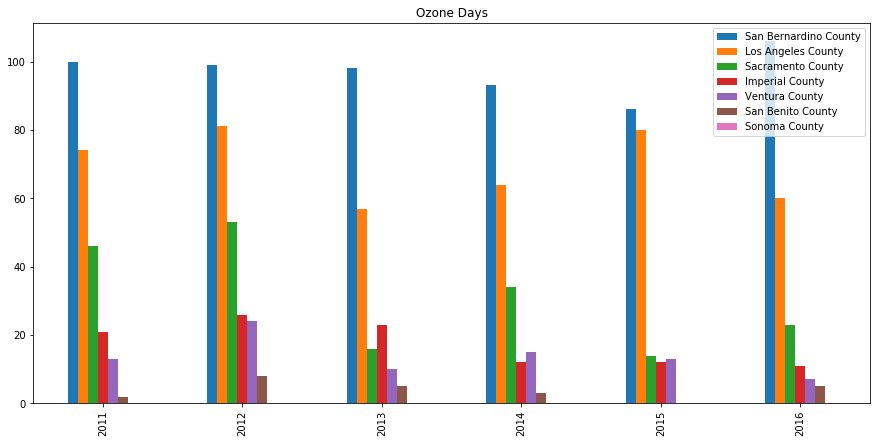

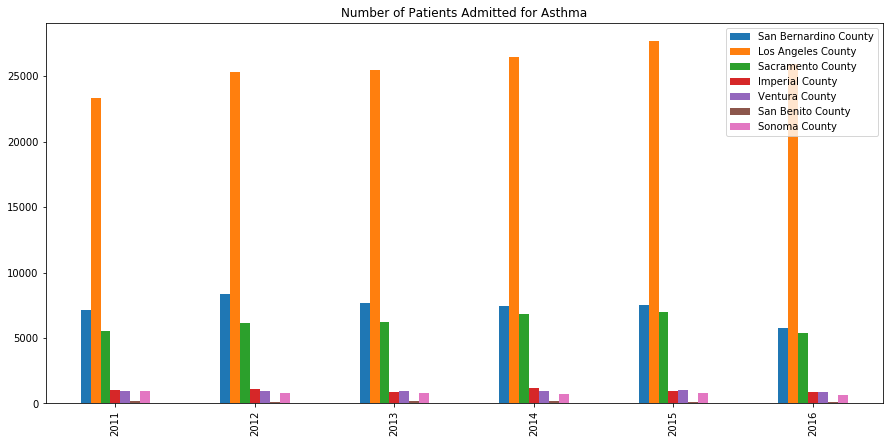

In [892]:
df = pd.DataFrame({'length': [1.5, 0.5, 1.2, 0.9, 3],'width': [0.7, 0.2, 0.15, 0.2, 1.1]}, index= ['pig', 'rabbit', 'duck', 'chicken', 'horse'])
ozoneDays[2:].plot.bar(title = "Ozone Days", figsize=(15,7))
asthma[:-1].plot.bar(title = "Number of Patients Admitted for Asthma", figsize=(15,7))

In [1097]:
# Preparing full asthma dataset for 2016
asthma2016 = pd.DataFrame()
asthma2016List = []
allNumerator = asthmaAll['Numerator'].tolist()
allPercent = asthmaAll['Percent'].tolist()

for i in range(len(allNumerator)):
    if (asthmaAll['Year'].tolist()[i] == 2016):
        numAsth = int(allNumerator[i].replace(",", "")) * (int(allPercent[i])/100)
        asthma2016List.append(numAsth)
        asthma2016 = asthma2016.append(asthmaAll[i:i+1])

asthma2016['NumAsthma'] = asthma2016List
asthma2016 = asthma2016.rename(index = str, columns = {"Geography": "County"})
asthma2016

County  Year Age Group            Strata Strata Name Numerator  \
6069          Alameda  2016  All Ages  Total Population    All Ages     9,086   
6070           Amador  2016  All Ages  Total Population    All Ages       187   
6071            Butte  2016  All Ages  Total Population    All Ages       770   
6072        Calaveras  2016  All Ages  Total Population    All Ages       171   
6073       California  2016  All Ages  Total Population    All Ages   174,733   
6074           Colusa  2016  All Ages  Total Population    All Ages        67   
6075     Contra Costa  2016  All Ages  Total Population    All Ages     6,021   
6076        Del Norte  2016  All Ages  Total Population    All Ages       172   
6077        El Dorado  2016  All Ages  Total Population    All Ages       564   
6078           Fresno  2016  All Ages  Total Population    All Ages     6,930   
6079            Glenn  2016  All Ages  Total Population    All Ages       103   
6080         Humboldt  2016  All Ages  Total Population    All Ages       815   
6081         Imperial  2016  All Ages  Total Population    All Ages     1,287   
6082             Inyo  2016  All Ages  Total Population    All Ages        90   
6083             Kern  2016  All Ages  Total Population    All Ages     5,008   
6084            Kings  2016  All Ages  Total Population    All Ages     1,027   
6085             Lake  2016  All Ages  Total Population    All Ages       487   
6086           Lassen  2016  All Ages  Total Population    All Ages       118   
6087      Los Angeles  2016  All Ages  Total Population    All Ages    50,778   
6088           Madera  2016  All Ages  Total Population    All Ages       956   
6089            Marin  2016  All Ages  Total Population    All Ages       543   
6090         Mariposa  2016  All Ages  Total Population    All Ages        66   
6091        Mendocino  2016  All Ages  Total Population    All Ages       451   
6092           Merced  2016  All Ages  Total Population    All Ages     2,211   
6093            Modoc  2016  All Ages  Total Population    All Ages        59   
6094             Mono  2016  All Ages  Total Population    All Ages        33   
6095         Monterey  2016  All Ages  Total Population    All Ages     1,959   
6096             Napa  2016  All Ages  Total Population    All Ages       439   
6097           Nevada  2016  All Ages  Total Population    All Ages       267   
6098           Orange  2016  All Ages  Total Population    All Ages     8,878   
6099           Placer  2016  All Ages  Total Population    All Ages       968   
6100           Plumas  2016  All Ages  Total Population    All Ages        99   
6101        Riverside  2016  All Ages  Total Population    All Ages     9,596   
6102       Sacramento  2016  All Ages  Total Population    All Ages     8,953   
6103       San Benito  2016  All Ages  Total Population    All Ages       268   
6104   San Bernardino  2016  All Ages  Total Population    All Ages    11,335   
6105        San Diego  2016  All Ages  Total Population    All Ages    10,068   
6106    San Francisco  2016  All Ages  Total Population    All Ages     2,997   
6107      San Joaquin  2016  All Ages  Total Population    All Ages     4,245   
6108  San Luis Obispo  2016  All Ages  Total Population    All Ages       926   
6109        San Mateo  2016  All Ages  Total Population    All Ages     2,382   
6110    Santa Barbara  2016  All Ages  Total Population    All Ages     1,641   
6111      Santa Clara  2016  All Ages  Total Population    All Ages     5,534   
6112       Santa Cruz  2016  All Ages  Total Population    All Ages       864   
6113           Shasta  2016  All Ages  Total Population    All Ages       726   
6115         Siskiyou  2016  All Ages  Total Population    All Ages       128   
6116           Solano  2016  All Ages  Total Population    All Ages     3,349   
6117           Sonoma  2016  All Ages  Total Population    All Ages     1,682   
6118       Stanislaus  2016  All Ages  Total P

In [1093]:
asthma2016.rename?

In [1021]:
asthma_stand = standard_units(asthma2016['NumAsthma'])

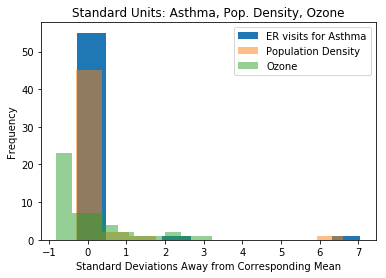

In [1024]:
plt.hist(asthma_stand)
plt.hist(pop_stand, alpha = 0.5)
plt.hist(ozone_stand, alpha = 0.5)
leg = ["ER visits for Asthma", "Population Density", "Ozone"]
plt.legend(leg)
plt.title("Standard Units: Asthma, Pop. Density, Ozone")
plt.xlabel("Standard Deviations Away from Corresponding Mean")
plt.ylabel("Frequency")
plt.show();

## A/B Testing for Asthma VS. Ozone

A/B Testing
Using A/B Testing to see if different datasets (# of ER visits for Asthma and # of days ozone levels are above regulatory standards) have an association.

Null Hypothesis:
The difference or similarity in the distribution between the # of Days above standard ozone level is the same for ER visits for Asthma per county in CA happens by random chance.

Alternative Hypothesis:
The number of people visiting the ER for asthma-related reasons are influenced by the level of ozone in the corresponding county (number of days ozone level is higher than the reg. standard). Differences or similarities in the distribution does not happen by random chance.

Test Statisitic: Difference between mean of standard deviations of two groups (number of counties above corresponding average)

In [1026]:
difference_of_means(asthma_stand, ozone_stand)

6.046005085767501e-17

Observed Value:  0.42984832761084085
Empirical P-value:  0.001
The empirical P-value is  0.001  in this particular run, meaning that about  999.0  our of 1000 permuted samples resulted in a differences of  0.42984832761084085  or lower.


0.001

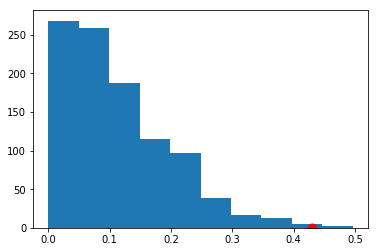

In [1056]:
ABTest(abs(asthma_stand), abs(ozone_stand))

### Conclusion for A/B Testing between ER visits for Asthma VS Ozone Level Data:
Since the p-value is less than the p-value cut off (decided to be 5%), we can reject the null hypothesis and concldue that The number of people visiting the ER for asthma-related reasons are influenced by the level of ozone in the corresponding county (number of days ozone level is higher than the reg. standard). Differences or similarities in the distribution does not happen by random chance. 

# A/B Testing for ER Visits for Asthma VS Particulate Matter Concentration

Null Hypothesis: The difference or similarity in the distribution between the particulate matter concentration is the same for ER visits for Asthma per county in CA happens by random chance.

Alternative Hypothesis: The number of people visiting the ER for asthma-related reasons are influenced by the particulate matter concentration in the corresponding county. Differences or similarities in the distribution does not happen by random chance.

Test Statisitic: Difference between mean of standard deviations of two groups (number of counties above corresponding average)

Observed Value:  0.44911011860340316
Empirical P-value:  0.001
The empirical P-value is  0.001  in this particular run, meaning that about  999  our of 1000 permuted samples resulted in a difference of  0.44911011860340316  or lower.


0.001

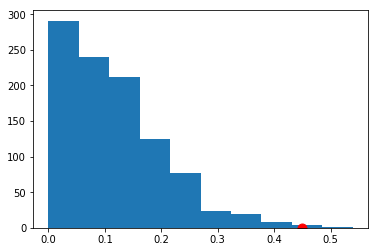

In [1083]:
part_stand = standard_units(partAll['2016'].tolist())
ABTest(abs(asthma_stand), abs(part_stand))

### Conclusion for A/B Testing between ER visits for Asthma VS Particulate Matter Concentration:
Since the p-value is less than the decided 5% p-value cut-off, we can reject the null and support the alternative hypothesis with the results of this test.

### -----------------------------------------------------------------------------------------------------------------------------------------------------

### Determining Strength of Linear Relationship between # ER Visits for Asthma and # Days Ozone Level Above Reg. Standard


In [1122]:
#plot scatter of asthma2016 and ozoneAll
for i in range(len(asthma2016['County'])):
    asthma2016['County'][i] = asthma2016['County'][i] + " County"
    
mergeAsthmaOzone = ozoneAll.merge(asthma2016)
mergeAsthmaOzone = pd.merge(ozoneAll, asthma2016, left_on='County', right_on='County')
mergeAsthmaOzone


C:\Users\pro\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


6069            Alameda County
6070             Amador County
6071              Butte County
6072          Calaveras County
6073         California County
6074             Colusa County
6075       Contra Costa County
6076          Del Norte County
6077          El Dorado County
6078             Fresno County
6079              Glenn County
6080           Humboldt County
6081           Imperial County
6082               Inyo County
6083               Kern County
6084              Kings County
6085               Lake County
6086             Lassen County
6087        Los Angeles County
6088             Madera County
6089              Marin County
6090           Mariposa County
6091          Mendocino County
6092             Merced County
6093              Modoc County
6094               Mono County
6095           Monterey County
6096               Napa County
6097             Nevada County
6098             Orange County
6099             Placer County
6100             Plumas County
6101    

2009 2010 2011 2012 2013 2014 2015 2016                  County  Year  \
0   104   97  100   99   98   93   86  106   San Bernardino County  2016   
1    92   90  101  110   79   81   67   87           Tulare County  2016   
2   103   88   80   83   64   88   69   78             Kern County  2016   
3    71   57   69   87   81   82   73   75           Fresno County  2016   
4    89   76   90   76   76   66   55   69        Riverside County  2016   
5    75   75   74   81   57   64   80   60      Los Angeles County  2016   
6    38   53   46   27   47   39   42   49            Kings County  2016   
7    26   18   28   46   43   45   29   40           Madera County  2016   
8    35   28   38   24   29   40   29   28           Merced County  2016   
9    35   19   39   41   21   33   19   41        El Dorado County  2016   
10   47   25   46   53   16   34   14   23       Sacramento County  2016   
11   32   18   33   55   22   27   28   27       Stanislaus County  2016   
12   40   19   29   21   24   28   30   29        San Diego County  2016   
13   34   15   18   16   19   28   26   39           Nevada County  2016   
14   30   21   24   30    6   19   15   27           Placer County  2016   
15   26   29   21   26   23   12   12   11         Imperial County  2016   
16   21   20   20   34   16   17    5   16         Mariposa County  2016   
17   24   14   14   15    8   15   16   42           Tehama County  2016   
18   19    8   21   35    5   16   19   19      San Joaquin County  2016   
19   19    8   12   13    2   16   11   45         Tuolumne County  2016   
20   37   13   13   24   10   15   13    7          Ventura County  2016   
21   19   25   14   29    9    7    4    6  San Luis Obispo County  2016   
22   29   13   16   24    5   11    8   13            Butte County  2016   
23   31   13   11   13    2    4   18   22        Calaveras County  2016   
24    5    3    8   14    4    7    7   30           Sutter County  2016   
25    1   11    3   20    2   10    8    5           Amador County  2016   
26    8   12    5    4    2    5    7   13           Shasta County  2016   
27   12    4    4    4    5   10    8   13           Orange County  2016   
28    8    5    8    4    2    6    7   15          Alameda County  2016   
29    3    2   17    7    3    3    3    5             Inyo County  2016   
30    5    6    2    8    5    3    0    5       San Benito County  2016   
31    6    7    5    4    1    4    6    2     Contra Costa County  2016   
32    7    5    3    3    2    6    1    2    Santa Barbara County  2016   
33    7    8    1    3    1    4    4    1      Santa Clara County  2016   
34    8    2    1    8    0    1    3    4             Yolo County  2016   
35    4    3    3    3    2    1    1    1           Solano County  2016   
36    2    2    0    0    2    0    0    0             Napa County  2016   
37    0    1    0    0    1    0    1    0        San Mateo County  2016   
38    0    0    0    3    0    0    0    0             Lake County  2016   
39    4    0    1    0    1    1    0    0            Glenn County  2016   
40    0    0    0    1    1    0    0    0         Siskiyou County  2016   
41    0    0    0    1    0    0    0    0       Santa Cruz County  2016   
42    0    1    0    0    0    0    0    0           Colusa County  2016   
43    0    0    0    0    0    0    0    0        Mendocino County  2016   
44    0    0    0    0    0    0    0    0            Marin County  2016   
45    0    0    0    0    0    0    0    0           Sonoma County  2016   
46    1    0    0    0    0    0    0    0         Monterey County  2016   
47    0    0    0    0    0    0    0    0         Humboldt County  2016   
48    0    0    0    0    0    0    0    0    San Francisco County  2016   

   Age Group            Strata Strata Name Numerator  Percent  NumAsthma  
0   All Ages  Total Population    All Ages    11,335     51.9    5780.85  
1   All Ages  Total Population    All Ages     1,980

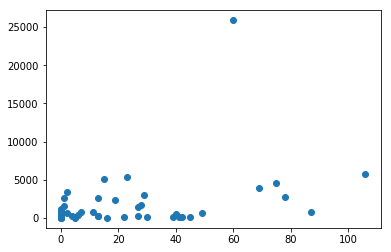

In [1126]:
plt.scatter(mergeAsthmaOzone['2016'], mergeAsthmaOzone['NumAsthma']);

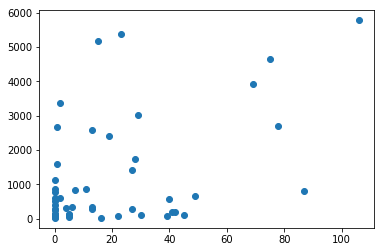

In [1133]:
filterMerge = mergeAsthmaOzone.sort_values("NumAsthma", ascending=False)[1:]
plt.scatter(filterMerge['2016'],filterMerge['NumAsthma'])

In [1136]:
# find linear correlation (to possibly predict future values)
stand2016 = standard_units(filterMerge['2016'])
standAsthma = standard_units(filterMerge['NumAsthma'])
r = np.mean(stand2016 * standAsthma)
r

0.4554643835867685

### Observation From Scatter Plot and Correlation Coefficient
The two datasets have a weak correlation coefficient (considering that -1 or 1 are the strongest correlation coefficients we can possibly obtain). We must question the accuracy of our A/B test that reveals that there is a strong association between # of ER visits for asthma and # of days when ozone levels are above the regulatory standard.

#### * End of Study *
#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------